# - TODO LIST
- Write better RBR Legato correction
- Test out Robert Todd's linear method
- Reread Todd

- Variance plots?
- SNR QC
- STD in Up metric

- Is shear bias the same in up and down?
- Does shear bias vary with speed or pitch?
- Co-variance table between shear in different bins and external variables (depth, X speed, mean X speed, 
- Which velocity values are correct? Near X or far X ?

- Surface drift validation seems offset in time! look at deployment 2


# I. Settings and initialisation

## 1.1. Settings

In [1]:
options = {
    'reprocessRawGliderData': False,
    'correctRBRLag' : True, # Perform Garau lag correction (TODO, pretty crappy)
    'correctADCPHeading' : True,
    'ADCP_discardFirstBin' : False, # First bin often very affected by glider, good to discard, in future we should extend blanking distance
    'ADCP_correlationThreshold': 50, # 70
    'ADCP_amplitudeThreshold' : 75, # 75
    'ADCP_velocityThreshold' : 0.7, # 0.6
    'correctXshear' : True,
    'correctYshear' : False,
    'correctZshear' : False,
    'correctZZshear' : False,
    }

# correctOxygenLag = False

# depth_weighting for sheaar correction regression

## 1.2. Paths

In [2]:
### Bornholm
# adcp_path = 'D:/Storage/VOTO_ADCP/Bornholm/sea063_M22.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/Jupyter/Data/Bornholm_SEA063_M22.pqt'
# top_mounted = True

### Skagerak
# adcp_path = 'D:/Storage/VOTO_ADCP/Skag/sea045_M44.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/Jupyter/Data/Skag_SEA045_M44.pqt'
# top_mounted = True

### Alseamar
# adcp_path = 'D:/Storage/Dropbox/WorkGU/22-07 Paper - JAOTECH - glider ADCP/external_datasets/alseamar_sea015m127/CCU/ADCP/sea015_M124.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/22-07 Paper - JAOTECH - glider ADCP/external_datasets/alseamar_sea015m127/SEA015M127.pqt'
# top_mounted = False

#adcp_path = 'D:/Storage/Dropbox/WorkGU/22-07 Paper - JAOTECH - glider ADCP/external_datasets/alseamar_sea030m103/sea030_M103.ad2cp.00001*.nc'
#filename = 'D:/Storage/Dropbox/WorkGU/22-07 Paper - JAOTECH - glider ADCP/external_datasets/alseamar_sea030m103/SEA030M103.pqt'
#top_mounted = False

In [3]:
### OMAN DATASETS

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211105_Dep1_post/ADCP_proc/sea057_M35_1.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211105_Dep1_post/Oman_deployment_1.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211118_Dep2_post/ADCP/sea057_M38.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211118_Dep2_post/Oman_deployment_2.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211220_Dep3_post/ADCP/sea057_M40.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/211220_Dep3_post/Oman_deployment_3.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220126_Dep4_post/ADCP/sea057_M43.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220126_Dep4_post/Oman_deployment_4.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220224_Dep5_post/ADCP/sea057_M45.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220224_Dep5_post/Oman_deployment_5.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220327_Dep6_post/ADCP/sea057_M47.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220327_Dep6_post/Oman_deployment_6.pqt'
# top_mounted = False

# adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220808_Dep7_post/ADCP/sea057_M51.ad2cp.00000*.nc'
# filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220808_Dep7_post/Oman_deployment_7.pqt'
# top_mounted = False

adcp_path = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220916_Dep8_post/ADCP/sea057_M53.ad2cp.00000*.nc'
filename = 'D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220916_Dep8_post/Oman_deployment_8.pqt'
top_mounted = False

## 1.3. Imports

In [93]:
import os, gc, sys, warnings
from glob import glob
import importlib

sys.path.append(r'D:/Storage/Repositories/SeaExplorerTools')
import SXBQ as sx
import BYQtools as byq

# from tqdm.notebook import tqdm
from tqdm import tqdm
from multiprocessing import Pool
from datetime import datetime as dt
    
import numpy as np
import pandas as pd
import xarray as xr
from scipy.interpolate import interp1d, interp2d
from scipy.optimize import fsolve, fmin
from scipy.signal import convolve as conv

import gsw

import matplotlib.pyplot as plt
import seaborn as sns
import cmocean.cm as cmo

warnings.filterwarnings(action='ignore', message='Mean of empty slice')
warnings.filterwarnings(action='ignore', message='invalid value encountered in divide')

sns.set(font='Franklin Gothic Book',
        rc={
         'axes.axisbelow': False,
         'axes.edgecolor': 'Black',
         'axes.facecolor': 'lightgrey',
         'axes.grid': False,
         'axes.labelcolor': 'darkgrey',
         'axes.spines.right': True,
         'axes.spines.top': True,
         'figure.facecolor': 'white',
         'lines.solid_capstyle': 'round',
         'patch.edgecolor': 'k',
         'patch.force_edgecolor': True,
         'text.color': 'dimgrey',
         'xtick.bottom': False,
         'xtick.color': 'dimgrey',
         'xtick.direction': 'out',
         'xtick.top': False,
         'ytick.color': 'dimgrey',
         'ytick.direction': 'out',
         'ytick.left': False,
         'ytick.right': False},
         font_scale=1)

## 1.4. Helper functions

In [5]:
def RunningMedian(x,N):
    grid = np.ones((len(x)+2*N, 1 + 2*N ))*np.NaN
    for istep in range(np.shape(grid)[1]):
        grid[istep:len(x)+istep, istep] = x
    return np.nanmedian(grid,axis=1)[N:-N]

def RunningMax(x,N):
    grid = np.ones((len(x)+2*N, 1 + 2*N ))*np.NaN
    for istep in range(np.shape(grid)[1]):
        grid[istep:len(x)+istep, istep] = x
    return np.nanmax(grid,axis=1)[N:-N]

def RunningMin(x,N):
    grid = np.ones((len(x)+2*N, 1 + 2*N ))*np.NaN
    for istep in range(np.shape(grid)[1]):
        grid[istep:len(x)+istep, istep] = x
    return np.nanmin(grid,axis=1)[N:-N]

def RunningMean(x,N):
    grid = np.ones((len(x)+2*N, 1 + 2*N ))*np.NaN
    for istep in range(np.shape(grid)[1]):
        grid[istep:len(x)+istep, istep] = x
    return np.nanmean(grid,axis=1)[N:-N]

def interp(x,y,xi):
    _gg = np.isfinite(x+y)
    return interp1d(x[_gg], y[_gg], bounds_error=False, fill_value=np.NaN)(xi)

def rmsd(x):
    return np.sqrt(np.nanmean(x**2))

def plog(msg):
    print(str(dt.now().replace(microsecond=0))+' : '+msg)
    return None

# II. Load and process glider data

## 2.1. Load and split profiles

In [6]:
if options['reprocessRawGliderData']:
    data = sx.sxdf([filename.rsplit('/',1)[0]+'/**/*.gli.sub*.gz',
                filename.rsplit('/',1)[0]+'/**/*.pld1.raw*.gz'])
    data.process_basic_variables()
    data.save(filename)
else:
    data = sx.load(filename)
    data.process_basic_variables()
plog('Loaded glider data')

100%|████████████████████████████████████████| 249/249 [00:02<00:00, 87.81it/s]
D:\Storage\Repositories\SeaExplorerTools\SXBQ.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(pd.concat(_tmp, ignore_index=True), sort=True)
100%|████████████████████████████████████████| 249/249 [11:19<00:00,  2.73s/it]
D:\Storage\Repositories\SeaExplorerTools\SXBQ.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(pd.concat(_tmp, ignore_index=True), sort=True)


Parsing GPS data from NAV files and creating latitude and longitude variables.
True GPS values are marked as false in variable "DeadReckoning".
Saving to D:/Storage/Dropbox/WorkGU/21-06 Oman HAB Deployments/Deployments/220916_Dep8_post/Oman_deployment_8.pqt
2022-09-16 09:46:30 : Loaded glider data


In [7]:
def _process():
    #data.data.sort_values('Timestamp', ignore_index=True, inplace=True)
    data.median_resample()

    _gd = np.isfinite(data.data['diveNum'].values)
    _, _tmp = np.unique( np.round(data.data['diveNum'].values[_gd]) ,return_inverse=True)

    data.data.loc[_gd,'diveNum'] = np.round(_tmp+1)
    data.data['diveNum'] = data.data['diveNum'].interpolate('nearest')
        
    data.data['profileNum'] = data.data['diveNum'].values*2
    _tmp = data.data['NAV_RESOURCE'].interpolate('nearest').values
    ind = (_tmp == 100) | (_tmp == 110) | (_tmp == 116)
    data.data.loc[ind,'profileNum'] = data.data.loc[ind,'profileNum'] - 1
    
    plog('Glider profiles processed')

_process()

2022-09-16 09:46:38 : Glider profiles processed


## 2.2. Process the RBR temperature and salinity data 

### Correct for RBR sensor lag and pressure bias for this series of sensors

In [8]:
def _process():
    X2 = 1.8e-06
    X3 = -9.472e-10
    X4= 2.112e-13
    Cmeas = data.data.LEGATO_CONDUCTIVITY.values
    Pmeas = data.data.LEGATO_PRESSURE.values
    data.data.LEGATO_CONDUCTIVITY =  Cmeas / (1 + X2*Pmeas + X3*Pmeas**2 + X4*Pmeas**3)
    data.data.LEGATO_SALINITY = gsw.SP_from_C(data.data.LEGATO_CONDUCTIVITY.values, data.data.LEGATO_TEMPERATURE.values, Pmeas)
    plog('Performed pressure correction on salinity data')

if 'LEGATO_PRESSURE' in data.data:
    _process()

2022-09-16 09:46:39 : Performed pressure correction on salinity data


In [99]:
if 'LEGATO_PRESSURE' in data.data:
    if options['correctRBRLag']:
        importlib.reload(sx)
        data = sx.correctSalinityGarau(data)
        plog('Corrected RBR data for lag')
    else:
        data.data['salinity'] = data.data.LEGATO_SALINITY
        data.data['temperature'] = data.data.LEGATO_TEMPERATURE
        plog('Skipped RBR lag correction')

Performing thermal mass correction...
         Assuming a sampling frequency of 1.0001391088371279 Hz.
Beginning regression (slow)...
         Initial minimisation score: 3.139787882566452.


 65%|██████████████████████████▋              | 65/100 [00:34<00:18,  1.88it/s]


Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 65
         Function evaluations: 123
         Final minimisation score: 3.345310688018799e-06.
Regressed coefficients:
[0.0134601  0.02761056 7.18918271 2.81600837]
Applying correction to all data (slow)...
2022-09-16 10:48:58 : Corrected RBR data for lag


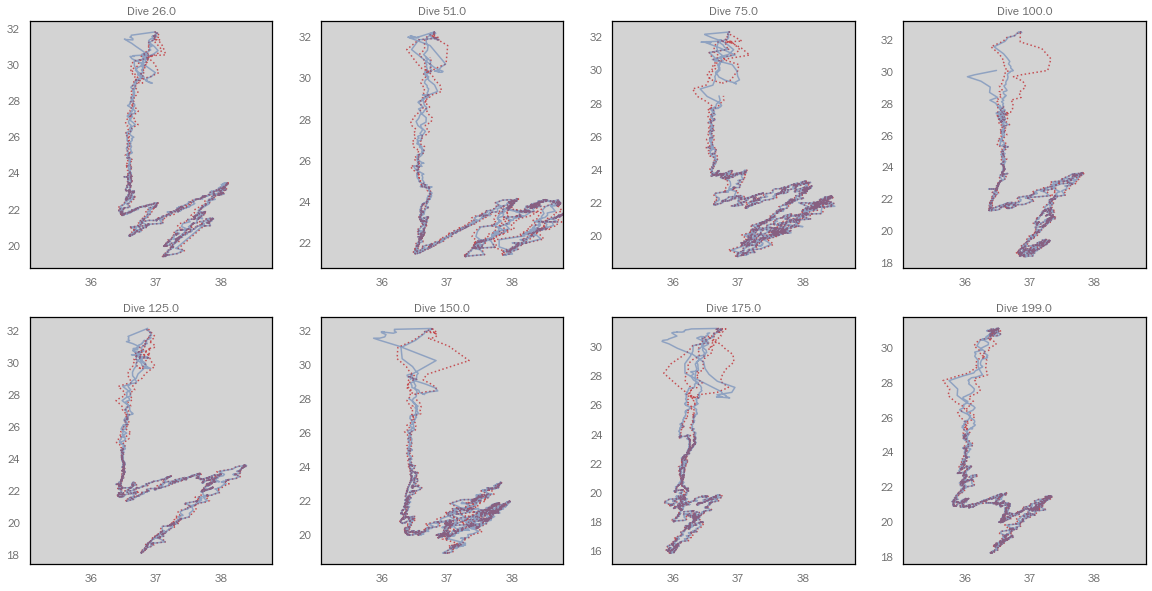

In [101]:
def _verify():
    plt.figure(figsize=(20,10))

    dives = data.data.diveNum.values
    dives = np.unique(dives[np.isfinite(dives)])
    dives = np.round(np.percentile(dives,[10,20,30,40,50,60,70,80]))

    xlims = np.nanpercentile(data.data.salinity.values,[1,99])

    for idx in range(len(dives)):
        plt.subplot(2,int(len(dives)/2),idx+1)
        dn = (data.data.diveNum==dives[idx]) & (data.data.LEGATO_PRESSURE > 5) & (data.data.LEGATO_PRESSURE < 250)
        plt.plot(data.data.LEGATO_SALINITY[dn],data.data.LEGATO_TEMPERATURE[dn],':r')
        plt.plot(data.data.salinity[dn],data.data.temperature[dn],'-b',alpha=0.5)
        plt.title('Dive '+str(dives[idx]))
        plt.xlim(xlims)

if 'LEGATO_PRESSURE' in data.data:
    _verify()

In [15]:
if 'GPCTD_PRESSURE' in data.data:
    data.data['temperature'] = data.data['GPCTD_TEMPERATURE'].interpolate()
    data.data['salinity'] = gsw.SP_from_C(data.data['GPCTD_CONDUCTIVITY'].interpolate().values*10,data.data['GPCTD_TEMPERATURE'].interpolate().values,data.data['GPCTD_PRESSURE'].interpolate())
    data.data['LEGATO_PRESSURE'] = data.data['GPCTD_PRESSURE'].interpolate()

## 2.3. Calculate derived variables

### TEOS-10 T&S dependents

In [16]:
# Ancillary variables
def _process(data):
    data['sa'] = gsw.SA_from_SP(data['salinity'].values,data['LEGATO_PRESSURE'].values,data['longitude'].values,data['latitude'].values)
    
    data['ct'] = gsw.CT_from_t(data['sa'].values,data['temperature'].values,data['LEGATO_PRESSURE'].values)
    
    data['sigma0'] = gsw.sigma0(data['sa'].values,data['ct'].values)
    
    data['soundspeed'] = gsw.sound_speed(data['sa'].values,data['ct'].values,data['LEGATO_PRESSURE'].values)
    
    data['depth'] = -gsw.z_from_p(data['LEGATO_PRESSURE'].values,data['latitude'].values)
    
    data['date_float'] = data.Timestamp.values.astype('float')
    
    plog('Calculated T&S derived variables')
    return data

data.data = _process(data.data)

2022-09-16 10:00:18 : Calculated T&S derived variables


### Dissolved oxygen ( TODO )

In [17]:
# Oxygen TODO
# missing lag correction
def _process(data):
    o2_sol = gsw.O2sol(data['sa'],data['ct'],data['LEGATO_PRESSURE'],data['longitude'],data['latitude'])
    o2_sat =  data['AROD_FT_DO'] / gsw.O2sol( data['sa']*0, data['AROD_FT_TEMP'], data['LEGATO_PRESSURE']*0,data['longitude'],data['latitude'])
    data['o2'] = o2_sat * o2_sol
    data['o2_sat'] = o2_sat * 100
    data['aou'] = o2_sol - data['o2']
    plog('Calculated oxygen variables')
    return data

if 'AROD_FT_DO' in data.data:
    data.data = _process(data.data)

2022-09-16 10:00:19 : Calculated oxygen variables


### Optical particulate backscatter

In [18]:
def _process(data):
    def calculate_bbp(beta_total, beam_angle=117, wavelength=700):
        # Scaled output from SeaExplorer gives us Beta for water and particple.
        # https://oceanobservatories.org/wp-content/uploads/2015/10/1341-00540_Data_Product_SPEC_FLUBSCT_OOI.pdf
        beta_sw = byq.betasw_ZHH2009(data.temperature.values,data.salinity.values, wavelength, beam_angle)
        beta_p = beta_total - beta_sw
        Chi_p = 1.08 # For 117* angle (Sullivan & Twardowski, 2009)
        # Chi_p = 1.17 # For 140* angle (Sullivan & Twardowski, 2009)
        bbp = 2 * np.pi * Chi_p * beta_p # in m-1
        return bbp
    
    obs = [x for x in data.columns if ('FL' == x[:2]) & ('_BB_' in x) & ('SCALED' in x)]
    for idx in range(len(obs)):
        var = obs[idx]
        wl = int(''.join(filter(str.isdigit, var)))
        plog('Calculating particulate backscatter at '+str(wl)+' nm.')
        data['bbp_'+str(wl)],_,_ = calculate_bbp(data[var].values, wavelength=wl)
    return data

data.data = _process(data.data)

2022-09-16 10:00:19 : Calculating particulate backscatter at 700 nm.


## 2.4. Define gridding axis based on glider profile times and data range

In [19]:
y_res = 1
yaxis = np.arange(0,np.nanmax(np.ceil(data.data.LEGATO_PRESSURE.values)),y_res)
xaxis = data.data.date_float.groupby(data.data.profileNum).agg('mean').index
taxis = pd.to_datetime(data.data.date_float.groupby(data.data.profileNum).agg('mean').values)
days = np.unique(data.data.Timestamp.round('D'))
   
out = {}

# III. ADCP Data Processing

## 3.1. Load ADCP AVG data and xarray adjust coordinates

In [20]:
ADCP = xr.open_mfdataset(adcp_path,group='Data/Average')
ADCP_settings = xr.open_mfdataset(glob(adcp_path)[0],group='Config')
bin_size = ADCP_settings.attrs['avg_cellSize']
blanking_distance = ADCP_settings.attrs['avg_blankingDistance']

In [21]:
ADCP

<xarray.Dataset>
Dimensions:                    (time: 516855, Velocity Range: 12,
                                Correlation Range: 12, Amplitude Range: 12,
                                Physicalbeam_dim: 4)
Coordinates:
  * time                       (time) datetime64[ns] 2022-08-08T10:08:45.4385...
  * Velocity Range             (Velocity Range) float32 2.2 4.2 ... 22.2 24.2
  * Correlation Range          (Correlation Range) float32 2.2 4.2 ... 22.2 24.2
  * Amplitude Range            (Amplitude Range) float32 2.2 4.2 ... 22.2 24.2
Dimensions without coordinates: Physicalbeam_dim
Data variables: (12/43)
    VelocityBeam1              (time, Velocity Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    VelocityBeam2              (time, Velocity Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    VelocityBeam3              (time, Velocity Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    VelocityBeam4              (time, Velocity Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    CorrelationBeam1           (time, Correlation Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    CorrelationBeam2           (time, Correlation Range) float32 dask.array<chunksize=(258385, 12), meta=np.ndarray>
    ...                         ...
    EnsembleCount              (time) float64 dask.array<chunksize=(258385,), meta=np.ndarray>
    WaterTemperature           (time) float32 dask.array<chunksize=(258385,), meta=np.ndarray>
    Pressure                   (time) float64 dask.array<chunksize=(258385,), meta=np.ndarray>
    Heading                    (time) float32 dask.array<chunksize=(258385,), meta=np.ndarray>
    Pitch                      (time) float32 dask.array<chunksize=(258385,), meta=np.ndarray>
    Roll                       (time) float32 dask.array<chunksize=(258385,), meta=np.ndarray>

In [22]:
ADCP = ADCP.assign_coords(
    Latitude=("time", 
              interp( data.data['Timestamp'].values.astype('float'), data.data['latitude'], ADCP.time.values.astype('float') ) ))

ADCP = ADCP.assign_coords(
    profileNum=("time", 
                np.round(interp(data.data['Timestamp'].values.astype('float'), data.data['profileNum'], ADCP.time.values.astype('float'))) ))

ADCP = ADCP.assign_coords(
    Depth=("time", -gsw.z_from_p(ADCP['Pressure'].values,ADCP['Latitude'].values)))

ADCP = ADCP.assign_coords(
    bin=("Velocity Range", np.arange(len(ADCP['Velocity Range'].values))))
ADCP = ADCP.swap_dims({'Velocity Range':'bin'})

ADCP = ADCP.assign_coords(
    bin=("Correlation Range", np.arange(len(ADCP['Correlation Range'].values))))
ADCP = ADCP.swap_dims({'Correlation Range':'bin'})

ADCP = ADCP.assign_coords(
    bin=("Amplitude Range", np.arange(len(ADCP['Amplitude Range'].values))))
ADCP = ADCP.swap_dims({'Amplitude Range':'bin'})

plog('Finished loading ADCP data')

2022-09-16 10:00:36 : Finished loading ADCP data


## 3.2 Correct ADCP positioning data

### Calculate depth of ADCP bins

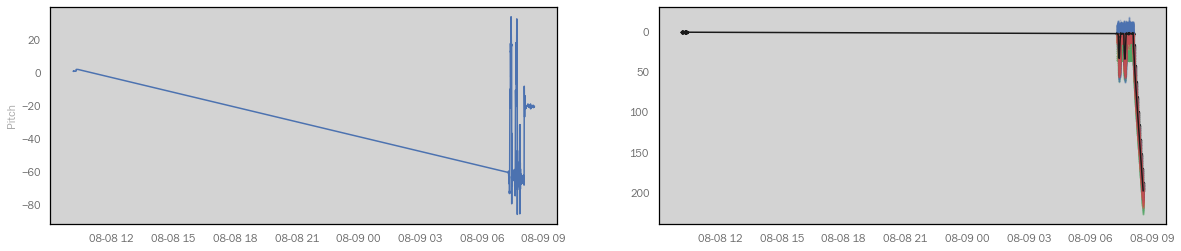

In [23]:
def remapADCPdepth(ADCP, bin_size, blanking_distance, top_mounted=top_mounted):
    if top_mounted:
        direction = 1
        theta_rad_1 = np.arccos(  np.cos(np.deg2rad(47.5 - ADCP['Pitch']))  * np.cos(np.deg2rad(ADCP['Roll']))  )
        theta_rad_2 = np.arccos(  np.cos(np.deg2rad(25 -   ADCP['Roll'] ))  * np.cos(np.deg2rad(ADCP['Pitch']))  )
        theta_rad_3 = np.arccos(  np.cos(np.deg2rad(47.5 + ADCP['Pitch']))  * np.cos(np.deg2rad(ADCP['Roll']))  )
        theta_rad_4 = np.arccos(  np.cos(np.deg2rad(25 +   ADCP['Roll'] ))  * np.cos(np.deg2rad(ADCP['Pitch']))  )
    else:
        direction = -1
        theta_rad_1 = np.arccos(  np.cos(np.deg2rad(47.5 + ADCP['Pitch']))  * np.cos(np.deg2rad(ADCP['Roll']))  )
        theta_rad_2 = np.arccos(  np.cos(np.deg2rad(25 +   ADCP['Roll'] ))  * np.cos(np.deg2rad(ADCP['Pitch']))  )
        theta_rad_3 = np.arccos(  np.cos(np.deg2rad(47.5 - ADCP['Pitch']))  * np.cos(np.deg2rad(ADCP['Roll']))  )
        theta_rad_4 = np.arccos(  np.cos(np.deg2rad(25 -   ADCP['Roll'] ))  * np.cos(np.deg2rad(ADCP['Pitch']))  )
        
    # Upward facing ADCP, so beam 1 ~= 22 deg on the way up, beam 3 on the way down
    # Returns angles of each beam from the UP direction
    
    z_bin_distance = blanking_distance + np.arange(len(ADCP.bin))*bin_size + 0.5*bin_size
    
    ADCP['D1'] = (
                   ['time','bin'],
                   np.tile(ADCP['Depth'], (len(ADCP.bin), 1)).T \
                     - direction \
                     * np.tile(z_bin_distance/np.cos(np.deg2rad(47.5)), (len(ADCP.time), 1)) \
                     * np.tile(np.cos(theta_rad_1), (len(ADCP.bin), 1)).T \
                   )
    ADCP['D2'] = (
                   ['time','bin'],
                   np.tile(ADCP['Depth'], (len(ADCP.bin), 1)).T \
                    - direction \
                    * np.tile(z_bin_distance/np.cos(np.deg2rad(25)), (len(ADCP.time), 1)) \
                    * np.tile(np.cos(theta_rad_2), (len(ADCP.bin), 1)).T \
                  )
    ADCP['D3'] = (
                   ['time','bin'],
                   np.tile(ADCP['Depth'], (len(ADCP.bin), 1)).T \
                    - direction \
                    * np.tile(z_bin_distance/np.cos(np.deg2rad(47.5)), (len(ADCP.time), 1)) \
                    * np.tile(np.cos(theta_rad_3), (len(ADCP.bin), 1)).T \
                  )
    ADCP['D4'] = (
                   ['time','bin'],
                   np.tile(ADCP['Depth'], (len(ADCP.bin), 1)).T \
                    - direction \
                    * np.tile(z_bin_distance/np.cos(np.deg2rad(25)), (len(ADCP.time), 1)) \
                    * np.tile(np.cos(theta_rad_4), (len(ADCP.bin), 1)).T \
                  )  
    
    plt.close('all')
    plt.figure(figsize=(20,4))
    x = np.arange(1000)
    
    times = np.tile(ADCP.time[x].values, (len(ADCP['bin']), 1)).T
    
    plt.subplot(121)
    plt.plot(ADCP.time[x],ADCP.Pitch[x])
    plt.ylabel('Pitch')
    
    plt.subplot(122)
    plt.scatter(ADCP.time[x],ADCP.Pressure[x],5,'k')
    plt.scatter(times.flatten(),ADCP.isel(time=x)['D1'].values.flatten(),1,'g',alpha=0.2)
    plt.scatter(times.flatten(),ADCP.isel(time=x)['D2'].values.flatten(),1,'y',alpha=0.2)
    plt.scatter(times.flatten(),ADCP.isel(time=x)['D3'].values.flatten(),1,'b',alpha=0.2)
    plt.scatter(times.flatten(),ADCP.isel(time=x)['D4'].values.flatten(),1,'r',alpha=0.2)
    plt.plot(ADCP.time[x],ADCP.Pressure[x],'k')

    plt.gca().invert_yaxis()

    return ADCP

ADCP = remapADCPdepth(ADCP,bin_size,blanking_distance)

### ADCP Heading correction

First run
        <total-intensity units="nT">44201</total-intensity>

Target = 442.01
Optimization terminated successfully.
         Current function value: 2.598059
         Iterations: 457
         Function evaluations: 671
[[ 0.82954098 -0.00802157 -0.00279464]
 [-0.00394043  0.85951304  0.00204591]
 [-0.01101108  0.02394938  0.8631055 ]]
[-0.00626716  0.00838522 -0.00156268]


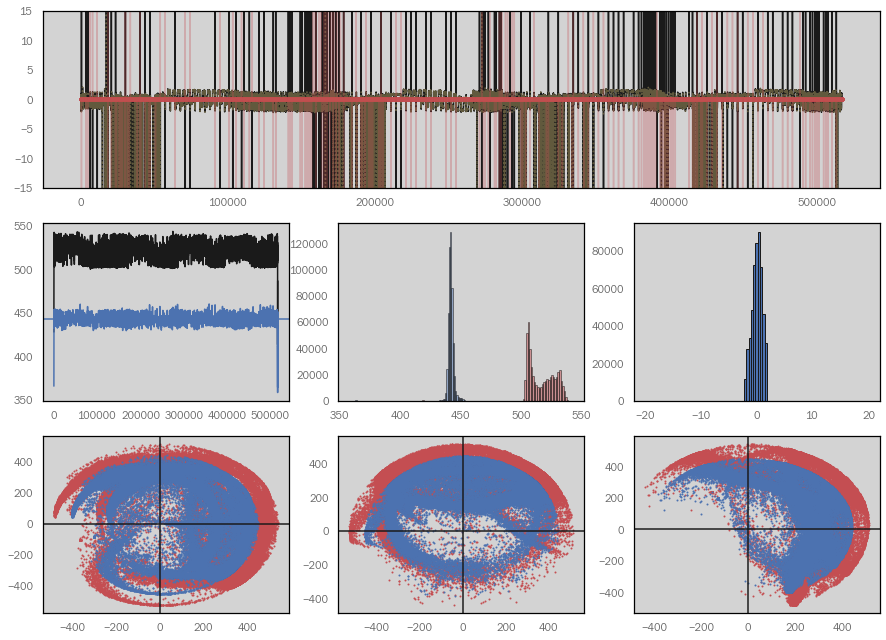

In [24]:
def _process(ADCP):
    
    # # Get local geomagnetic target strength:
    def getGeoMagStrength():    
        lat = np.nanmedian(data.data.latitude)
        lon = np.nanmedian(data.data.longitude)
        date = pd.to_datetime(np.nanmean(data.data.Timestamp.values.astype('float')))
        year = date.year
        month = date.month
        day = date.day
        
        url = str('http://geomag.bgs.ac.uk/web_service/GMModels/igrf/13/?'+
              'latitude='+str(lat)+'&longitude='+str(lon)+
              '&date='+str(year)+'-'+str(month)+'-'+str(day)+
              '&resultFormat=csv')
        import urllib
        magdata = urllib.request.urlopen(url)
        string = 'empty'
        while not not string:
            out = magdata.readline().decode("utf-8")
            if 'total-intensity units="nT"' in out:
                string = out
                print(out)
                break
        target = float(string.split('>')[1].split('<')[0])
        nT2milligauss = 10**-9 * 10000 * 1000 # To tesla, then to gauss then to millgauss
        print('Target = '+str(target*nT2milligauss))
        return target*nT2milligauss
        
        # url = str('https://www.ngdc.noaa.gov/geomag-web/calculators/calculateIgrfwmm?'+
        #       'lat1='+str(lat)+'&lon1='+str(lon)+
        #       '&startYear='+str(year)+'&endYear='+str(year)+
        #       '&startMonth='+str(month)+'&endMonth='+str(month)+
        #       '&startDay='+str(day)+'&endDay='+str(day)+
        #       '&resultFormat=csv')
        # import urllib
        # magdata = urllib.request.urlopen(url)
        # string = 'empty'
        # while not not string:
        #     out = magdata.readline().decode("utf-8")
        #     if not out:
        #         break
        #     string = out
        # target = float(string.split(',')[4])
        # nT2milligauss = 10**-9 * 10000 * 1000 # To tesla, then to gauss then to millgauss
        # print('Target = '+str(target*nT2milligauss))
        # return target*nT2milligauss
    
    target = getGeoMagStrength()
    
    if top_mounted:
        sign = -1
    else:
        sign = 1
    
    MagX = ADCP['MagnetometerX']
    MagY = ADCP['MagnetometerY']
    MagZ = ADCP['MagnetometerZ']
    
    simple = False
    verysimple = False
    softonly = False
    
    roll = ADCP['Roll']
    pitch = ADCP['Pitch']
    
    norm    = lambda x,y,z : np.sqrt(x**2 + y**2 + z**2)
    rmsd    = lambda x,y,z : np.sqrt( np.mean( ( norm(x,y,z) - target)**2 ) )
    
    cosd    = lambda x : np.cos(np.deg2rad(x))
    sind    = lambda x : np.sin(np.deg2rad(x))
    atan2d  = lambda x,y : np.rad2deg(np.arctan2(x,y))
    rot_x   = lambda x,y,z : x*cosd(pitch) + y*sind(roll)*sind(pitch) + z*cosd(roll)*sind(pitch)
    rot_y   = lambda x,y,z : y*cosd(roll) - z*sind(roll)
    wrap    = lambda x : (x+360)%360
    heading = lambda x,y,z : wrap( atan2d(rot_x(x,sign * y,sign * z), rot_y(x,sign * y,sign * z)) - 90 )
    
    def calibrate(x,y,z,coeffs):
        if simple:
            coeffs[[1,2,3,5,6,7]] = 0
        if verysimple:
            coeffs[:9] = 0
            coeffs[[0,4,8]] = 1
        if softonly:
            coeffs[-3:] = 0
            
        A = np.reshape(coeffs[:9],(3,3))
        B = coeffs[-3:]
        out = A @ np.array([x-B[0], y-B[1], z-B[2]])
        return out[0,:],out[1,:],out[2,:]

    def minimisation(coeffs):
        x,y,z = calibrate(MagX,MagY,MagZ,coeffs)
        return rmsd(x,y,z)
    
    coeffs = fmin(minimisation,np.array([1,0,0,0,1,0,0,0,1,0,0,0]))
    print(np.reshape(coeffs[:9],(3,3)))
    print(coeffs[-3:])
    
    magx,magy,magz = calibrate(MagX.values, MagY.values, MagZ.values,coeffs)
    cal_heading = heading(magx, magy, magz)
    
    %matplotlib inline
    plt.figure(figsize=(15,15))
    
    plt.subplot(411)
    plt.plot(cal_heading - ADCP.Heading,'-k')
    plt.plot(cal_heading - heading(MagX.values, MagY.values, MagZ.values),':y',alpha=0.4)
    plt.plot(ADCP.Heading - heading(MagX.values, MagY.values, MagZ.values),'-r.',alpha=0.3)
    plt.ylim([-15,15])
    
    plt.subplot(434)
    plt.plot(norm(MagX.values, MagY.values, MagZ.values),'-k')
    plt.plot(norm(magx,magy,magz),'-b')
    plt.axhline(target)
    
    plt.subplot(435)
    # bins = np.linspace(500,550,100)
    _ = plt.hist(norm(magx,magy,magz),100, color='b', alpha=0.5)
    _ = plt.hist(norm(MagX.values, MagY.values, MagZ.values),100, color='r', alpha=0.5)
    
    plt.subplot(436)
    _ = plt.hist(cal_heading - ADCP.Heading, np.linspace(-20,20,100))
    
    plt.subplot(437)
    plt.axvline(0,color='k')
    plt.axhline(0,color='k')
    plt.scatter(MagX.values, MagY.values, 1, 'r')
    plt.scatter(magx,magy, 1, 'b')
    
    plt.subplot(438)
    plt.axvline(0,color='k')
    plt.axhline(0,color='k')
    plt.scatter(MagY.values, MagZ.values, 1, 'r')
    plt.scatter(magy,magz, 1, 'b')
    
    plt.subplot(439)
    plt.axvline(0,color='k')
    plt.axhline(0,color='k')
    plt.scatter(MagZ.values, MagX.values, 1, 'r')
    plt.scatter(magz,magx, 1, 'b')
    
    mag_bias = norm(magx,magy,magz)-target
    
    return cal_heading


if options['correctADCPHeading']:
    try:
        ADCP['Heading'] = ('time', ADCP['Heading_old'].values)
        print('Resetting to original heading')
    except:
        print('First run')
    ADCP['Heading_old'] = ('time', ADCP['Heading'].values)
    ADCP['Heading'] = ('time', _process(ADCP).values + interp(
            data.data['Timestamp'].values.astype('float'), data.data['Declination'], ADCP.time.values.astype('float')
            ))

## 3.3. Correct ADCP velocity data

### Sound speed correction

In [25]:
def _process(ADCP):  
    try:
        true_ss = interp(data.data['date_float'].values, data.data['soundspeed'], ADCP.time.values.astype('float'))
        ADCP = ADCP.rename({'SpeedOfSound':'Raw_SpeedOfSound'})        
        ADCP['SpeedOfSound'] = ('time',true_ss)
        ADCP['SpeedOfSound'] = ADCP['SpeedOfSound'].interp()
        for beam in ['1','2','3','4']:
            # V_new = V_old * (c_new/c_old)
            ADCP['VelocityBeam'+beam] = ADCP['VelocityBeam'+beam] * (ADCP['SpeedOfSound'] / ADCP['Raw_SpeedOfSound'])
            plog('Corrected beam '+beam+' velocity for sound speed.')
    except:
        plog('Speed of sound correction has already been applied')
        
    return ADCP

ADCP = _process(ADCP)

2022-09-16 10:01:06 : Corrected beam 1 velocity for sound speed.
2022-09-16 10:01:06 : Corrected beam 2 velocity for sound speed.
2022-09-16 10:01:06 : Corrected beam 3 velocity for sound speed.
2022-09-16 10:01:06 : Corrected beam 4 velocity for sound speed.


### Outlier and poor correlation removal

In [26]:
if options['ADCP_discardFirstBin']: print(ADCP.dims); ADCP = ADCP.isel(bin = ADCP['bin'] > 0); print(ADCP.dims); plog('Discarded bin 0 from ADCP data')

In [27]:
# From Tanaka:
# the velocity was 0.5 m s-1 or less,
# the echo intensity (or amplitude) was 75 dB or less,
# the percent-good was 80 or greater,
# the signal-to-noise ratio (SNR) was 20 or greater.
def prct(ind):
    out = np.count_nonzero(ind)/n*100
    out = np.round(out*10)/10
    return str(out)

for beam in ['1','2','3','4']:    
    C = ADCP['CorrelationBeam'+beam].values.copy()
    n = len(C.flatten())
    ind = C < options['ADCP_correlationThreshold']
    C[ind] = np.NaN
    C[np.isfinite(C)] = 1
    plog('Beam '+beam+' correlation: '+prct(ind)+'% removed')
    
    A = ADCP['AmplitudeBeam'+beam].values.copy()
    ind = A > options['ADCP_amplitudeThreshold']
    A[ind] = np.NaN
    # A[A < 40] = np.NaN
    A[np.isfinite(A)] = 1
    plog('Beam '+beam+' amplitude: '+prct(ind)+'% removed')
    
    V = ADCP['VelocityBeam'+beam].values.copy()
    ind = np.abs(V) > options['ADCP_velocityThreshold']
    V[ind] = np.NaN
    V[np.isfinite(V)] = 1
    plog('Beam '+beam+' velocity: '+prct(ind)+'% removed')
    
    ADCP['VelocityBeam'+beam] = ADCP['VelocityBeam'+beam]*C*A*V
    

2022-09-16 10:01:06 : Beam 1 correlation: 24.1% removed
2022-09-16 10:01:06 : Beam 1 amplitude: 0.1% removed
2022-09-16 10:01:06 : Beam 1 velocity: 0.0% removed
2022-09-16 10:01:07 : Beam 2 correlation: 24.7% removed
2022-09-16 10:01:07 : Beam 2 amplitude: 0.2% removed
2022-09-16 10:01:07 : Beam 2 velocity: 0.0% removed
2022-09-16 10:01:07 : Beam 3 correlation: 26.7% removed
2022-09-16 10:01:07 : Beam 3 amplitude: 0.3% removed
2022-09-16 10:01:07 : Beam 3 velocity: 0.1% removed
2022-09-16 10:01:07 : Beam 4 correlation: 24.8% removed
2022-09-16 10:01:07 : Beam 4 amplitude: 0.2% removed
2022-09-16 10:01:07 : Beam 4 velocity: 0.1% removed


### Correct shear bias

In [28]:
### Defining coordinate transform functions for the 4 beam ADCP configuration
def quad_beam2xyzz_mat():
    # M11=0.6782; M12=0.0000; M13=-0.6782; M14=0.0000
    # M21=0.0000; M22=-1.1831; M23=0.0000; M24=1.1831
    # M31=0.7400; M32=0.0000; M33=0.7400; M34=0.0000
    # M41=0.0000; M42=0.5518; M43=0.0000; M44=0.5518
    M11=0.6782; M12=0.0000; M13=-0.6782; M14=0.0000
    M21=0.0000; M22=-1.1831; M23=0.0000; M24=1.1831
    M31=0.7400; M32=0.0000; M33=0.7400; M34=0.0000
    M41=0.0000; M42=0.5518; M43=0.0000; M44=0.5518
    T = np.array([[M11,M12,M13,M14], [M21,M22,M23,M24], [M31,M32,M33,M34], [M41,M42,M43,M44]])
    # if not top_mounted:
    #     T[1:,:] = -T[1:,:]
    return T

def quad_beam2xyzz(B1,B2,B3,B4):
    T = quad_beam2xyzz_mat()
    try:
        r,c = np.shape(B1.values)
    except:
        c = 1; r = len(B1.values)
    V = np.array([B1.values.flatten(),
                  B2.values.flatten(),
                  B3.values.flatten(),
                  B4.values.flatten()
                 ])
    XYZZ = V*0
    for col in np.arange(V.shape[1]):
        XYZZ[:,col] = T@V[:,col]   
    return np.reshape(XYZZ[0,:],[r,c]),np.reshape(XYZZ[1,:],[r,c]),np.reshape(XYZZ[2,:],[r,c]),np.reshape(XYZZ[3,:],[r,c])

def quad_xyzz2beam(X,Y,Z,ZZ):
    T = np.linalg.inv(quad_beam2xyzz_mat())
    r,c = np.shape(X.values)
    XYZZ = np.array([X.values.flatten(),
                  Y.values.flatten(),
                  Z.values.flatten(),
                  ZZ.values.flatten()
                 ])
    V = XYZZ*0
    for col in np.arange(XYZZ.shape[1]):
        V[:,col] = T@XYZZ[:,col]   
    return np.reshape(V[0,:],[r,c]),np.reshape(V[1,:],[r,c]),np.reshape(V[2,:],[r,c]),np.reshape(V[3,:],[r,c])

def do_xyzz2beam(ADCP):
    V = quad_xyzz2beam(ADCP['X4'],ADCP['Y4'],ADCP['Z4'],ADCP['ZZ4'])
    ADCP['VelocityBeam1'] = (['time','bin'], V[0])
    ADCP['VelocityBeam2'] = (['time','bin'], V[1])
    ADCP['VelocityBeam3'] = (['time','bin'], V[2])
    ADCP['VelocityBeam4'] = (['time','bin'], V[3])
    return ADCP
    
def do_beam2xyzz(ADCP):
    XYZZ = quad_beam2xyzz(ADCP['VelocityBeam1'],ADCP['VelocityBeam2'],ADCP['VelocityBeam3'],ADCP['VelocityBeam4'])
    ADCP['X4'] = (['time','bin'], XYZZ[0])
    ADCP['Y4'] = (['time','bin'], XYZZ[1])
    ADCP['Z4'] = (['time','bin'], XYZZ[2])
    ADCP['ZZ4'] = (['time','bin'], XYZZ[3])
    return ADCP

def plotit():
    plt.figure(figsize=(7,3))
    ADCP['X4'].diff(dim='bin').mean(dim='time').plot()
    ADCP['Y4'].diff(dim='bin').mean(dim='time').plot()
    ADCP['Z4'].diff(dim='bin').mean(dim='time').plot()
    ADCP['ZZ4'].diff(dim='bin').mean(dim='time').plot()
    plt.legend(('X','Y','Z','ZZ'))
    plt.ylim(np.array([-1,1])*5e-3)

2022-09-16 10:01:38 : Corrected X4


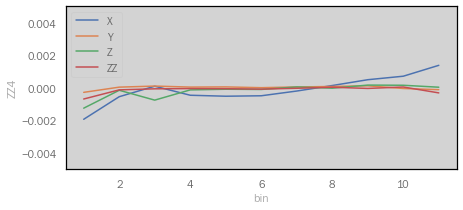

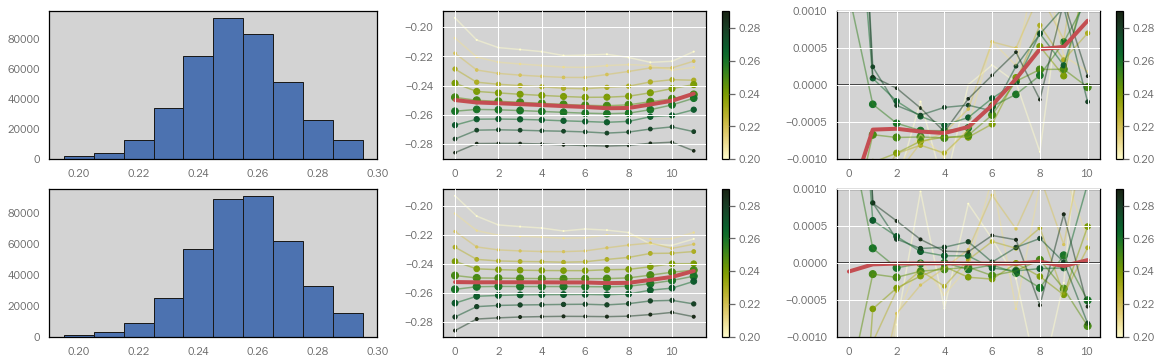

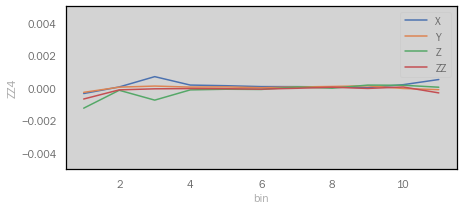

In [29]:
def shear_correction(var,correct=True):
    def get_correction_array(row):
        ### SEPARATION CRITERIA
        spd_thr_water = np.sqrt(ADCP['X4']**2 + ADCP['Y4']**2 + ((ADCP['Z4']+ADCP['ZZ4'])/2)**2)

        spd = spd_thr_water.values[:,0] #.values[:,5] #.mean('bin')

        range_interval = 0.01
        full_range = np.arange(0.2,0.3,range_interval)   # OMAN BEST: np.arange(0.2,0.3,range_interval)
        cmaps = np.arange(len(full_range))/len(full_range)

        ### WHAT TO PLOT
        variable = ADCP[var]
        _gd = (ADCP['Depth'] > 5)

        ### MAKE FIGURE
        colormap = cmo.speed
        alpha = 30/len(full_range)
        if alpha > 1.:
            alpha=0.5

        plt.subplot(2,3,1+row)
        sz = plt.hist(spd, bins = np.append(full_range, np.max(full_range)+range_interval)-(range_interval/2))[0]
        sz = sz/np.max(sz) * 50

        plt.subplot(2,3,2+row)
        x = []; y = []; c = []; s = []
        for idx,range_level in enumerate(full_range):
            color = colormap(cmaps[idx])
            ind = (np.abs(spd-range_level) < (range_interval/2)) & _gd
            arr = variable.isel(time=ind).mean('time').values
            plt.plot(arr, color=color, alpha=alpha)

            x.append(np.arange(len(arr)))
            y.append(arr)
            c.append(arr*0 + range_level)
            s.append(arr*0 + sz[idx])

        plt.plot(variable.isel(time=(spd > full_range[0]) & (spd < full_range[-1])).mean('time').values, color='r', linewidth=4)
        plt.scatter(x,y,s,c, cmap=colormap)
        plt.colorbar()
        plt.grid('on')

        plt.subplot(2,3,3+row)
        x = []; y = []; c = []; s = []
        for idx,range_level in enumerate(full_range):
            color = colormap(cmaps[idx])
            ind = (np.abs(spd-range_level) < (range_interval/2)) & _gd
            arr = variable.isel(time=ind).diff('bin').mean('time').values
            plt.plot(arr, color=color, alpha=alpha)

            x.append(np.arange(len(arr)))
            y.append(arr)
            c.append(arr*0 + range_level)
            s.append(arr*0 + sz[idx])

        plt.plot(variable.isel(time=(spd > full_range[0]) & (spd < full_range[-1])).diff('bin').mean('time').values, color='r', linewidth=4)
        plt.scatter(x,y,s,c, cmap=colormap)
        plt.colorbar()
        plt.axhline(0, color='k')
        plt.grid('on')
        plt.ylim(np.array([-1,1])*0.001)

        
        ref = np.cumsum(np.insert(variable.isel(time=(spd > full_range[0]) & (spd < full_range[-1])).diff('bin').mean('time').values,0,0))
        ref = ref - np.nanmean(ref)
        
        return ref
    
    plt.figure(figsize=(20,6))
    
    if correct:
        ADCP[var] = ADCP[var] - get_correction_array(0)
        _ = get_correction_array(3)
        plog('Corrected '+var)
    else:
        _ = get_correction_array(0)
    
    return None



ADCP = do_beam2xyzz(ADCP)
plotit()

if options['correctZZshear']: ADCP = do_beam2xyzz(ADCP); shear_correction('ZZ4'); ADCP = do_xyzz2beam(ADCP);
if options['correctZshear']: ADCP = do_beam2xyzz(ADCP); shear_correction('Z4'); ADCP = do_xyzz2beam(ADCP);
if options['correctYshear']: ADCP = do_beam2xyzz(ADCP); shear_correction('Y4'); ADCP = do_xyzz2beam(ADCP);
if options['correctXshear']: ADCP = do_beam2xyzz(ADCP); shear_correction('X4'); ADCP = do_xyzz2beam(ADCP);

if options['correctZZshear'] or options['correctZshear'] or options['correctYshear'] or options['correctXshear']: plotit();

### Pitching motion correction (TODO)

In [30]:
# def ADCP_rotation_correction():
#     ADCP['dPitch_dt'] = (['time'], np.gradient(np.deg2rad(ADCP.Pitch.values),ADCP.time.values.astype('float')/(10**9)))
#     dx=0.4
#     dz=0.125
#     a=47.5
#     b=25
#     ADCP['VelocityBeam1'] = ADCP['VelocityBeam1'] + ADCP['dPitch_dt']*(-dz * np.sin(np.deg2rad(a)) + dx * np.cos(np.deg2rad(a)))
#     ADCP['VelocityBeam3'] = ADCP['VelocityBeam3'] + ADCP['dPitch_dt']*( dz * np.sin(np.deg2rad(a)) + dx * np.cos(np.deg2rad(a)))
#     ADCP['VelocityBeam2'] = ADCP['VelocityBeam2'] + ADCP['dPitch_dt']*( dx * np.cos(np.deg2rad(b)) )
#     ADCP['VelocityBeam4'] = ADCP['VelocityBeam4'] + ADCP['dPitch_dt']*( dx * np.cos(np.deg2rad(b)) )

# # ADCP_rotation_correction()
# ### NOT RUNNING AS PROBABLY CODED FOR UPWARD FACING ADCP

## 3.4. Correct ADCP acoustic backscatter data (TODO)

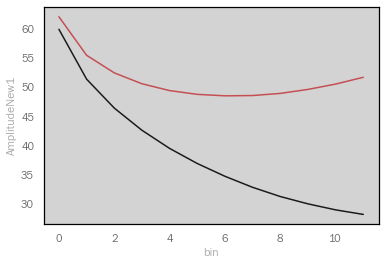

In [31]:
# https://www.sciencedirect.com/science/article/pii/S0278434304002171#fig2
# 2.1. Intensity correction

# For a single acoustic target, intensity falls proportional to distance squared. 
# For volume scattering, on the other hand, approximately half of the loss is 
# cancelled by the increasing number of (zooplankton) targets ensonified by the 
# spreading beam. Defining  and  as the corrected and measured ADCP beam intensity, 
# respectively, the correction for volume scattering is given by

# I(c) = I(m) + 2( 10 * log(r) + alpha * r )

# with r the distance from the transducer to each of the depth bins, alpha the
# absorption, or attenuation, coefficient, and where the extra factor of 2 accounts for 
# the return trip the sound pulse must make. For single target scattering, the correction
# recommended by RDI, the 10 in Eq. (1) is replaced with 20; this correction has been used,
# for example, by Thomson and Allen (2000), who examined macrozooplankton migration and 
# fish abundance. The rate of absorption in seawater is a function of pressure, temperature,
# salinity, pH, and sound frequency; using the empirical equation derived by Francois and 
# Garrison (1982) for a depth of 100 m, , and  for the ADCP frequency of 307 kHz.


def francoisgarrison(freq=None,S=None,T=None,pH=8.1,z=None):
    # Underwater acoustics: calculation of the absorption coefficient
    #
    # SYNTAX: a = francoisgarrison(freq,T,S,pH,z)
    # Units: [freq] = kHz, [T] = Celsius, [S] = ppt, [z] = m, [a] = dB/m
    # 
    # Reference: 
    # Sound absorption based on ocean measurements. Part II: Boric acid contribution 
    # and equation for total absorption 
    # R.E. Francois and G. R. Garrison
    # J. Acoust. Soc. Am. 72(6), December 1982
    
    #*******************************************************************************
    # Faro, Ter Set  7 23:46:58 WEST 2021
    # Written by Orlando Camargo Rodriguez
    #*******************************************************************************
    c   = 1412.0 + 3.21*T + 1.19*S + 0.0167*z
    theta = 273.0 + T
    fxf = freq**2
    f1 = 2.8*np.sqrt(S/35.0)*10**(4.0-1245.0/theta)
    f2 = 8.17*10**(8.0-1990.0/theta)/( 1.0 + 0.0018*(S-35.0) )
    A1 = 8.86/c*10**(0.78*pH-5)
    A2 = 21.44*S/c*( 1.0 + 0.025*T )
    A3 = 3.964e-4 - 1.146e-5*T + 1.45e-7*T**2 - 6.5e-10*T**3
    ind = (T <= 20)
    A3[ind] = 4.937e-4 - 2.59e-5*T[ind] + 9.11e-7*T[ind]**2 - 1.50e-8*T[ind]**3
    P1 = 1.0
    P2 = 1 - 1.35e-4*z + 6.2e-9*z**2
    P3 = 1 - 3.83e-5*z + 4.9e-10*z**2
    alpha = A1*P1*f1*fxf/( f1**2 + fxf ) + A2*P2*f2*fxf/( f2**2 + fxf ) + A3*P3*fxf
    return alpha/1000

a = np.cos(np.deg2rad(47.4)) # Beam 1 and 3 angle from Z 47.5
b = np.cos(np.deg2rad(25))   # Beam 2 and 4 angle from Z 25

ADCP['BeamRange1']=('bin',ADCP['Velocity Range'].values / a )
ADCP['BeamRange2']=('bin',ADCP['Velocity Range'].values / b )
ADCP['BeamRange3']=('bin',ADCP['Velocity Range'].values / a )
ADCP['BeamRange4']=('bin',ADCP['Velocity Range'].values / b )
    
ADCP['AcousticAttenuation'] = ('time', 
                               francoisgarrison(
                                   freq=1000,
                                   S=interp(data.data.Timestamp.values.astype('float'), data.data.salinity.interpolate('index').fillna(method='bfill').values, ADCP.time.values.astype('float')),
                                   T=interp(data.data.Timestamp.values.astype('float'), data.data.temperature.interpolate('index').fillna(method='bfill').values, ADCP.time.values.astype('float')),
                                   pH=8.1,
                                   z=ADCP['Depth'].values)
                              )

for beam in ['1','2','3','4']:
    # ADCP['AmplitudeNew'+beam] = (['time','bin'], (0.43*ADCP['AmplitudeBeam'+beam] + 20*np.log(ADCP['BeamRange'+beam]) + 2*ADCP['AcousticAttenuation']*ADCP['BeamRange'+beam]).values)# + 20 int(particule attenuation,range)
    ADCP['AmplitudeNew'+beam] = (['time','bin'], (ADCP['AmplitudeBeam'+beam] + 2*ADCP['AcousticAttenuation']*ADCP['BeamRange'+beam]).values)# + 20 int(particule attenuation,range)
    
ADCP['AmplitudeBeam1'].mean('time').plot(color='k')
ADCP['AmplitudeNew1'].mean('time').plot(color='r')

## 3.5. Remap 3-beam configuration onto isobars

In [32]:
## This is to avoid shear smearing because of tilted ADCP
def regridADCPdata(ADCP, bin_size, blanking_distance, depth_offsets=None):   
    
#     ## FN: calculate isobar offsets relative to glider depth for each ping
#     def calc_ideal_depth_offsets(bin_size, blanking_distance):
#         if top_mounted:
#             direction = 1
#         else:
#             direction = -1
#         threshold = 20
#         means = [np.nanmean(ADCP['CorrelationBeam'+str(x)],axis=0) for x in [1,2,3,4]]
#         stds = [np.nanstd(ADCP['CorrelationBeam'+str(x)],axis=0) for x in [1,2,3,4]]

#         max_bin = np.argmin(abs(np.nanmean([means[x] for x in range(4)],axis=0)  - threshold))
#         max_distance = blanking_distance + max_bin*bin_size + 0.5*bin_size

#         plt.close('all')
#         plt.figure(figsize=(15,7))
#         [plt.plot(ADCP['Correlation Range'].values,means[x],'-k') for x in range(4)]
#         [plt.plot(ADCP['Correlation Range'].values,means[x]+stds[x],':r') for x in range(4)]
#         [plt.plot(ADCP['Correlation Range'].values,means[x]-stds[x],':r') for x in range(4)]
#         plt.axvline(max_bin,color='g')
#         plt.title('Bin correlations')

#         return np.arange(blanking_distance + bin_size/2, max_distance+bin_size, bin_size)*direction

    ## Calculate desired interpolation depth offsets
    if depth_offsets is None:
        if top_mounted:
            direction = 1
        else:
            direction = -1
        # depth_offsets = calc_ideal_depth_offsets(bin_size, blanking_distance)
        depth_offsets = np.arange(0, 16, bin_size/2)*direction
        
    print('Using the following depth offsets:')
    print(depth_offsets)
    print(' ')
    print('Running gridding on all 4 beams:')
    
    ## Extract to np array for speed
    adcp_depth = ADCP['Depth'].values
        
    for beam in ['1','2','3','4']:
        plog('Calculating beam '+beam)
        def interp1d_np(x,y):
            _gd = np.isfinite(y)
            if np.count_nonzero(_gd) > 1:
                xi = interp1d(x[_gd], y[_gd], bounds_error=False, fill_value=np.NaN)(depth_offsets)
            else:
                xi = depth_offsets * np.NaN
            return xi
        
        ADCP.load()
        ADCP['V'+beam] = xr.apply_ufunc(
            interp1d_np,
            ADCP['Depth']-ADCP['D'+beam],
            ADCP['VelocityBeam'+beam],
            input_core_dims=[['bin'],['bin']],
            output_core_dims=[['gridded_bin']],
            exclude_dims=set(("bin",)),
            vectorize=True,
            output_sizes={'gridded_bin': len(depth_offsets)},
        )        
        
    ADCP = ADCP.assign_coords({'depth_offset':(['gridded_bin'], depth_offsets)})
    ADCP = ADCP.assign_coords({'bin_depth':(['time','gridded_bin'], 
                                     np.tile(ADCP['Depth'].values.astype('float'), (len(ADCP.gridded_bin), 1)).T
                                     - np.tile(depth_offsets, (len(ADCP.time), 1))
                                    )})
    
    ## Discard everything that wasn't gridded
    # ADCP = ADCP.drop(labels=['D1','D2','D3','D4',
    #                          'CorrelationBeam1','CorrelationBeam2','CorrelationBeam3','CorrelationBeam4',
    #                          'VelocityBeam1','VelocityBeam2','VelocityBeam3','VelocityBeam4',
    #                          'AmplitudeBeam1','AmplitudeBeam2','AmplitudeBeam3','AmplitudeBeam4'])
    return ADCP

ADCP = regridADCPdata(ADCP, bin_size, blanking_distance)
# ADCP

Using the following depth offsets:
[ -0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12. -13.
 -14. -15.]
 
Running gridding on all 4 beams:
2022-09-16 10:01:55 : Calculating beam 1
2022-09-16 10:02:25 : Calculating beam 2
2022-09-16 10:02:55 : Calculating beam 3
2022-09-16 10:03:25 : Calculating beam 4


## 3.6. Transform beams to XYZ and ENU velocities

Assuming ADCP is bottom mounted
2022-09-16 10:03:56 : Calculating X,Y,Z from isobaric 3-beam measurements.


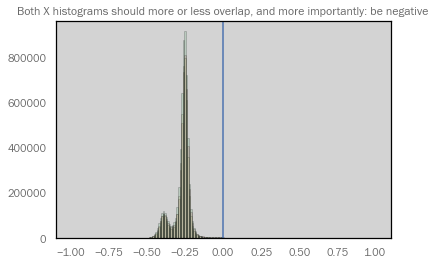

In [33]:
def calcXYZfrom3beam():
    def sin(x):
        return np.sin(np.deg2rad(x))
    def cos(x):
        return np.cos(np.deg2rad(x))

    a = 47.5 # Beam 1 and 3 angle from Z
    b = 25 # Beam 2 and 4 angle from Z

    xyz2beam_fore = np.array([
        [sin(a),0,cos(a)],
        [0,-sin(b),cos(b)],
        [0,sin(b),cos(b)]
    ])
    xyz2beam_aft = np.array([
        [-sin(a),0,cos(a)],
        [0,-sin(b),cos(b)],
        [0,sin(b),cos(b)]
    ])

    beam2xyz_fore = np.linalg.inv(xyz2beam_fore)
    beam2xyz_aft = np.linalg.inv(xyz2beam_aft)

    V_fore = beam2xyz_fore @ np.array([
        ADCP['V1'].values.flatten(),
        ADCP['V2'].values.flatten(),
        ADCP['V4'].values.flatten()
        ])
    V_aft = beam2xyz_aft @ np.array([
        ADCP['V3'].values.flatten(),
        ADCP['V2'].values.flatten(),
        ADCP['V4'].values.flatten()
        ])

    if rmsd(V_aft[1:,:]-V_fore[1:,:]) != 0:
        plt.plot(V_aft[1:,:]-V_fore[1:,:],'-kx')
        print(rmsd(V_aft[1:,:]-V_fore[1:,:]))
        plog('Something is wrong - abort and investigate...')

    X_fore = np.reshape( V_fore[0,:] , np.shape(ADCP['V1']) )
    X_aft = np.reshape( V_aft[0,:] , np.shape(ADCP['V1']) )
    
    plt.close('all')
    _ = plt.hist(X_fore.flatten(),np.linspace(-1,1,200),color='r',alpha=0.2)
    _ = plt.hist(X_aft.flatten(),np.linspace(-1,1,200),color='y',alpha=0.2)
    plt.axvline(0)
    plt.title('Both X histograms should more or less overlap, and more importantly: be negative')
    
    use_aft_on_climb = ADCP['Pitch'] > 0
    
    X = X_fore.copy()
    
    if top_mounted == True:
        print('Assuming ADCP is top mounted')
        X[~use_aft_on_climb,:] = X_aft[~use_aft_on_climb,:]
    else:
        print('Assuming ADCP is bottom mounted')
        X[use_aft_on_climb,:] = X_aft[use_aft_on_climb,:]
    
    
    _ = plt.hist(X.flatten(),np.linspace(-1,1,200),color='g',alpha=0.2)
    
    ADCP['X'] = (['time','gridded_bin'], X )
    ADCP['Y'] = (['time','gridded_bin'], np.reshape( V_aft[1,:] , np.shape(ADCP['V1']) ) )
    ADCP['Z'] = (['time','gridded_bin'], np.reshape( V_aft[2,:] , np.shape(ADCP['V1']) ) )
    
    plog('Calculating X,Y,Z from isobaric 3-beam measurements.')
    
    
calcXYZfrom3beam()

In [34]:
def calcENUfromXYZ():
    def M_xyz2enu(heading,pitch,roll):
        hh = np.pi*(heading-90)/180
        pp = np.pi*pitch/180
        rr = np.pi*roll/180

        _H = np.array([
            [np.cos(hh),np.sin(hh),0], 
            [-np.sin(hh),np.cos(hh),0], 
            [0,0,1]
        ])
        _P = np.array([
            [np.cos(pp), 0, -np.sin(pp)] ,
            [0, 1, 0] , 
            [ np.sin(pp), 0, np.cos(pp)]
        ])
        _R = np.array([
            [1, 0, 0] ,
            [0, np.cos(rr), -np.sin(rr)] , 
            [0, np.sin(rr), np.cos(rr)]
        ])

        _M = _H@_P@_R
        return _M

    H = ADCP['Heading'].values
    P = ADCP['Pitch'].values
    R = ADCP['Roll'].values

    if top_mounted:
        direction = 1
    else:
        direction = -1
        
    E = ADCP['X'].values.copy()
    N = ADCP['Y'].values.copy()*direction
    U = ADCP['Z'].values.copy()*direction

    r,c = np.shape(E)
    
    for i in tqdm(range(r)):
        XYZ2ENU = M_xyz2enu(H[i],P[i],R[i])
        for j in range(c):
            E[i,j], N[i,j], U[i,j] = XYZ2ENU @ [E[i,j], N[i,j], U[i,j]]   
    

    ADCP['E'] = (['time','gridded_bin'], E )
    ADCP['N'] = (['time','gridded_bin'], N )
    ADCP['U'] = (['time','gridded_bin'], U )
    
    plog('Converted from XYZ to ENU')

calcENUfromXYZ()

100%|████████████████████████████████| 516855/516855 [00:55<00:00, 9375.71it/s]

2022-09-16 10:04:52 : Converted from XYZ to ENU


239889 245342


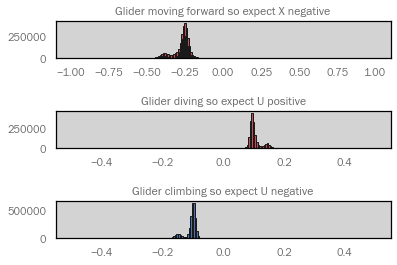

In [35]:
def verify():
    plt.figure()

    PD = (ADCP['Pitch'].values < 0) & (ADCP['Depth'].values > 20)
    PU = (ADCP['Pitch'].values > 0) & (ADCP['Depth'].values > 20)

    print(np.count_nonzero(PD),np.count_nonzero(PU))

    plt.subplot(511)
    _ = plt.hist(ADCP.isel(time=PD)['X'].values.flatten(),np.linspace(-1,1,200),color='r')
    _ = plt.hist(ADCP.isel(time=PU)['X'].values.flatten(),np.linspace(-1,1,200)/2,color='b')
    plt.title('Glider moving forward so expect X negative')

    plt.subplot(513)
    _ = plt.hist(ADCP.isel(time=PD)['U'].values.flatten(),np.linspace(-1,1,200)/2,color='r')
    plt.title('Glider diving so expect U positive')

    plt.subplot(515)
    _ = plt.hist(ADCP.isel(time=PU)['U'].values.flatten(),np.linspace(-1,1,200)/2,color='b')
    plt.title('Glider climbing so expect U negative')
    
verify()

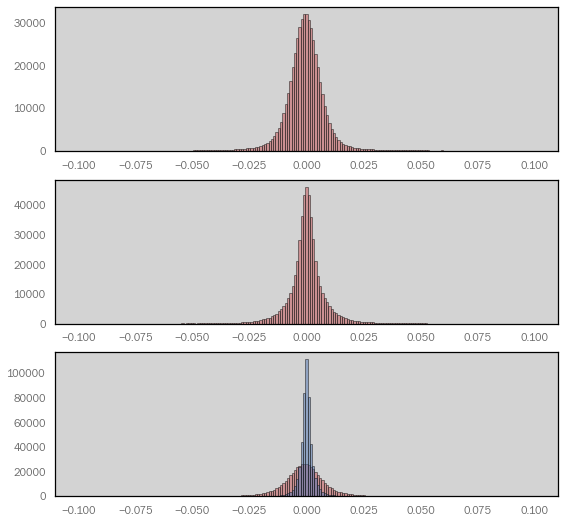

In [36]:
plt.figure(figsize=(9,9))

plt.subplot(311)
_ = plt.hist(ADCP['X'].mean(dim='gridded_bin').values.flatten()-ADCP['X4'].mean(dim='bin').values.flatten(),np.linspace(-1,1,200)/10,color='r',alpha=0.5)
plt.subplot(312)
_ = plt.hist(ADCP['Y'].mean(dim='gridded_bin').values.flatten()-ADCP['Y4'].mean(dim='bin').values.flatten(),np.linspace(-1,1,200)/10,color='r',alpha=0.5)
plt.subplot(313)
_ = plt.hist(ADCP['Z'].mean(dim='gridded_bin').values.flatten()-ADCP['Z4'].mean(dim='bin').values.flatten(),np.linspace(-1,1,200)/10,color='r',alpha=0.5)
_ = plt.hist(ADCP['Z'].mean(dim='gridded_bin').values.flatten()-ADCP['ZZ4'].mean(dim='bin').values.flatten(),np.linspace(-1,1,200)/10,color='b',alpha=0.5)


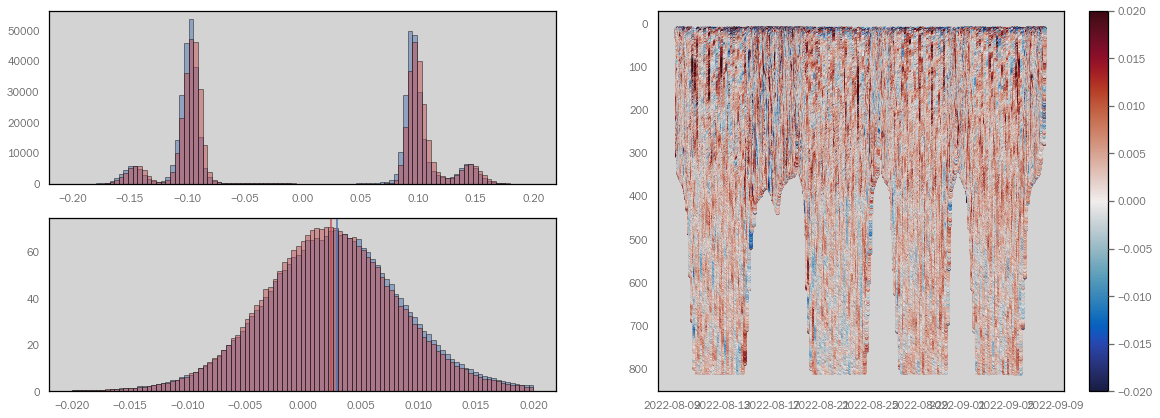

In [37]:
def _verify():

    _gd = (ADCP['Pressure'].values > 10)
    
    PD = (ADCP.isel(time=_gd)['Pitch'].values < 0) & (ADCP.isel(time=_gd)['Depth'].values > 20)
    PU = (ADCP.isel(time=_gd)['Pitch'].values > 0) & (ADCP.isel(time=_gd)['Depth'].values > 20)

    T = ADCP.isel(time=_gd)['time']
    D = ADCP.isel(time=_gd)['Depth']
    R = ADCP.isel(time=_gd)['Roll']
    U = ADCP.isel(time=_gd)['U'].mean(dim='gridded_bin').values.flatten()# * 1.009
    dP = np.gradient(ADCP.isel(time=_gd)['Depth'].values, ADCP.isel(time=_gd)['time'].astype('float')/1e9)
    
    bins = np.linspace(-1,1,100)*0.2
    
    plt.figure(figsize=(20,7))
    plt.subplot(221)
    _ = plt.hist(U,bins,color='b',alpha=0.5)
    _ = plt.hist(dP,bins,color='r',alpha=0.5)
    
    plt.subplot(223)
    _ = plt.hist((dP-U)[PD],bins/10,density=True,color='b',alpha=0.5)
    _ = plt.hist((dP-U)[PU],bins/10,density=True,color='r',alpha=0.5)
    plt.axvline(np.nanmean((dP-U)[PD]),color='b')
    plt.axvline(np.nanmean((dP-U)[PU]),color='r')
    
    plt.subplot(122)
    plt.scatter(T,D,5,dP-U, cmap=cmo.balance)
    plt.colorbar()
    plt.clim([bins[0]/10,bins[-1]/10])
    plt.gca().invert_yaxis()
    
    
_verify()

## 3.7. Calculate shear

In [38]:
ADCP['Sh_E'] = (['time','gridded_bin'],
                  ADCP['E'].differentiate('gridded_bin').values
                 )
ADCP['Sh_N'] = (['time','gridded_bin'],
                  ADCP['N'].differentiate('gridded_bin').values
                 )
ADCP['Sh_U'] = (['time','gridded_bin'],
                  ADCP['U'].differentiate('gridded_bin').values
                 )

# V. Flight model regression

## 5.1. Regress model and extract flight speeds

Should I lowpass filter velocities with a filter freq equal to N?

In [39]:
ADCP['GliderSpeed'] = (
    'time',
    np.sqrt(ADCP['X4']**2 + ADCP['Y4']**2 + ((ADCP['Z4']+ADCP['ZZ4'])/2)**2).isel(bin=np.arange(3)).mean('bin').interp().values
    )

In [56]:
def flight_model():
    importlib.reload(sx)
    # time, sal, temp_ext, temp_int, pres_ext, pres_int, lon, lat, ballast, pitch, profile, navresource, tau, adcp_speed, **param
    flight = sx.SemiDynamicModel(
           data.data.Timestamp, 
           data.data.salinity.interpolate('index').fillna(method='bfill').values, 
           data.data.temperature.interpolate('index').fillna(method='bfill').values, 
           data.data.LEGATO_PRESSURE.interpolate('index').fillna(method='bfill').values, 
           data.data.longitude.interpolate('index').fillna(method='bfill').values, 
           data.data.latitude.interpolate('index').fillna(method='bfill').values, 
           data.data.BallastPos.interpolate('index').fillna(method='bfill').values, 
           data.data.Pitch.interpolate('index').fillna(method='bfill').values, 
           data.data.profileNum.interpolate('nearest').fillna(method='bfill').values,
           data.data.NAV_RESOURCE.interpolate('nearest').fillna(method='bfill').values,
           0.5,
           interp(ADCP.time.values.astype('float'), ADCP.GliderSpeed, data.data.Timestamp.values.astype('float')),
           mass=60.772, vol0=0.059077990061655435, 
           Cd_0=0.068891783927366, Cd_1=0.8210920513705997, Cl=1.9140152638563785, 
           comp_p=4.3e-06, comp_t=7e-05)
    
    #flight.regression_parameters = ('Cd_0','Cd_1','Cl','vol0','comp_t', 'SSStau') # 'Cd_0','Cd_1','Cl','SSStau',     
    flight.regression_parameters = ('Cd_0','Cd_1','Cl','vol0') # 'Cd_0','Cd_1','Cl','SSStau', # WTF is lag_t again??
    flight._valid[data.data.LEGATO_PRESSURE < 5] = False
    # flight._valid[data.data.LEGATO_PRESSURE > 100] = False
    flight.regress(maxiter=300)

    data.data['alpha'] = flight.alpha
    data.data['speed'] = flight.speed
    data.data['speed_vert'] = flight.speed_vert
    data.data['speed_horz'] = flight.speed_horz
    data.data['w_H2O'] = flight.w_H2O

    return flight

flight = flight_model()

Number of valid points: 2228734 (out of 2580655)
Initial parameters:  {'mass': 60.772, 'vol0': 0.059077990061655435, 'area_w': 0.24, 'Cd_0': 0.068891783927366, 'Cd_1': 0.8210920513705997, 'Cl': 1.9140152638563785, 'comp_p': 4.3e-06, 'comp_t': 7e-05, 'SS_tau': 13}
Non-optimised score: 0.01583178748296843
Regressing...


 53%|█████████████████████▏                  | 159/300 [04:24<03:54,  1.66s/it]


Optimization terminated successfully.
         Current function value: 0.015262
         Iterations: 159
         Function evaluations: 270
Optimised parameters:  {'mass': 60.772, 'vol0': 0.05908331275297461, 'area_w': 0.24, 'Cd_0': 0.05716192894060977, 'Cd_1': 2.0064083701965267, 'Cl': 2.008617952211419, 'comp_p': 4.3e-06, 'comp_t': 7e-05, 'SS_tau': 13}
Final Optimised score: 0.015261604663511164


(19232.97923893912, 19234.136646231196)

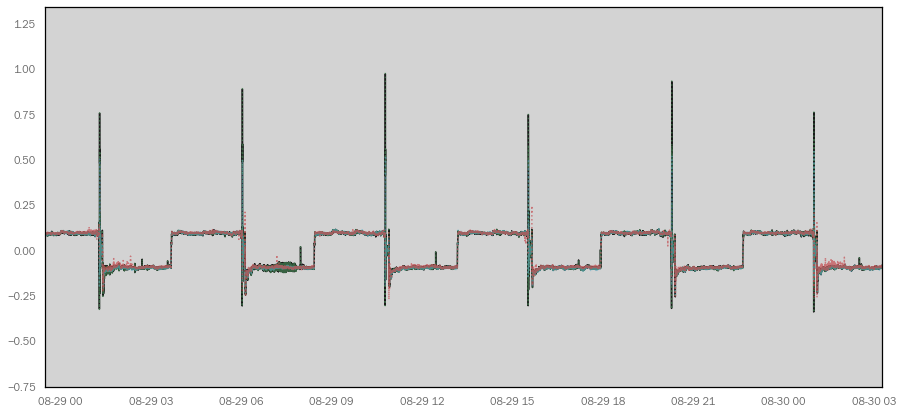

In [57]:
plt.figure(figsize=(15,7))
plt.plot(data.data.Timestamp.values,flight.dZdt,'-k')
plt.plot(data.data.Timestamp.values,-np.gradient(data.data.LEGATO_PRESSURE.values, data.data.Timestamp.values.astype('float')/(10**9)),':g',alpha=0.5)
plt.plot(ADCP['time'].values,-np.gradient(ADCP['Pressure'], ADCP['time'].values.astype('float')/(10**9)),':c',alpha=0.5)
plt.plot(ADCP['time'].values,-ADCP['U'].mean(dim='gridded_bin').values,':r',alpha=0.7)
plt.xlim([data.data.Timestamp[1700000],data.data.Timestamp[1800000]])

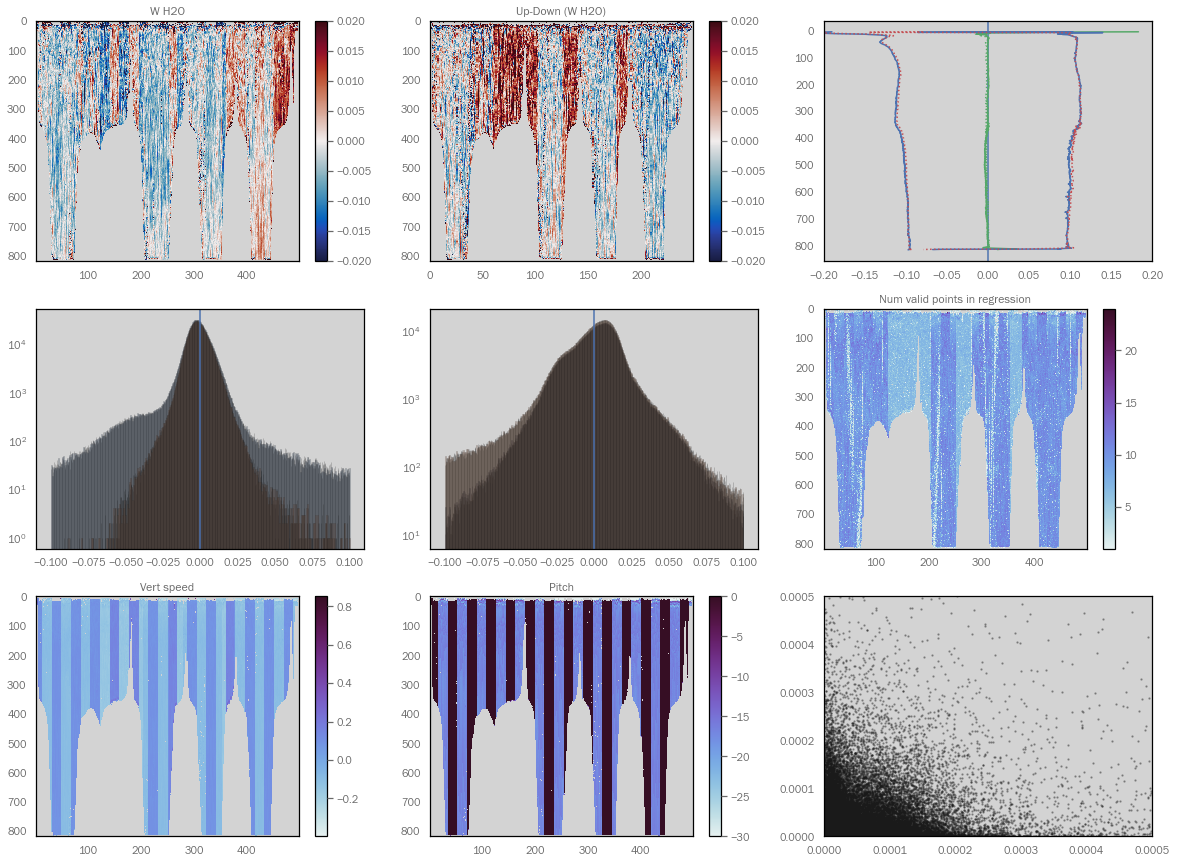

In [59]:
def verify(flight):
    plt.figure(figsize=(20,15))

    mask = flight._valid # & (np.sign(flight.dZdt) == -1)
    
    plt.subplot(331)
    V,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        flight.w_H2O[mask], 
        xi=xaxis, yi=yaxis, fn='mean')
    DZ,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        flight.dZdt[mask], 
        xi=xaxis, yi=yaxis, fn='mean')
    SV,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        flight.speed_vert[mask], 
        xi=xaxis, yi=yaxis, fn='mean')
    
    plt.pcolormesh(XI,YI,V,cmap=cmo.balance,shading='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.clim([-0.02,0.02])
    plt.title('W H2O')
    
    plt.subplot(332)
    if np.remainder(np.shape(V)[1],2) == 1:
        plt.pcolormesh(XI[:,:-1:2]/2,YI[:,:-1:2],V[:,:-1:2]-V[:,1::2],cmap=cmo.balance,shading='auto')
    else:
        plt.pcolormesh(XI[:,::2]/2,YI[:,::2],V[:,::2]-V[:,1::2],cmap=cmo.balance,shading='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.clim([-0.02,0.02])
    plt.title('Up-Down (W H2O)')
    
    plt.subplot(333)
    plt.axvline(0)
    plt.plot(np.nanmean(V[:,::2],axis=1),yaxis,'-g')
    plt.plot(np.nanmean(V[:,1::2],axis=1),yaxis,':g')
    plt.plot(np.nanmean(DZ[:,::2],axis=1),yaxis,'-b')
    plt.plot(np.nanmean(DZ[:,1::2],axis=1),yaxis,'-b')
    plt.plot(np.nanmean(SV[:,::2],axis=1),yaxis,':r')
    plt.plot(np.nanmean(SV[:,1::2],axis=1),yaxis,':r')
    plt.xlim([-0.2, 0.2])
    plt.gca().invert_yaxis()
    
    plt.subplot(334)
    _ = plt.hist(flight.w_H2O.flatten(), np.linspace(-0.1,0.1,1000),alpha=0.2)
    _ = plt.hist(flight.w_H2O[mask].flatten(), np.linspace(-0.1,0.1,1000),alpha=0.2)
    plt.axvline(0)
    plt.yscale('log')
    
    
    plt.subplot(335)
    _ = plt.hist(flight.speed[mask] - flight.speed_through_water[mask], np.linspace(-0.1,0.1,1000),alpha=0.2)
    _ = plt.hist(flight.speed - flight.speed_through_water, np.linspace(-0.1,0.1,1000),alpha=0.2)
    plt.axvline(0)
    plt.yscale('log')
    
    plt.subplot(336)
    V,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        flight._valid[mask], 
        xi=xaxis, yi=yaxis, fn='sum')
    plt.pcolormesh(XI,YI,V,cmap=cmo.dense,shading='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    # plt.clim([-0.02,0.02])
    plt.title('Num valid points in regression')
    
    plt.subplot(337)
    V,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        flight.dZdt[mask], 
        xi=xaxis, yi=yaxis, fn='mean')
    plt.pcolormesh(XI,YI,V,cmap=cmo.dense,shading='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    # plt.clim([-0.02,0.02])
    plt.title('Vert speed')
    
    plt.subplot(338)
    V,XI,YI = sx.grid2d(
        data.data.profileNum[mask].values,
        data.data.LEGATO_PRESSURE[mask].values, 
        np.rad2deg(flight.pitch[mask]), 
        xi=xaxis, yi=yaxis, fn='mean')
    plt.pcolormesh(XI,YI,V,cmap=cmo.dense,shading='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.clim([-30,0])
    plt.title('Pitch')
    
    
    plt.subplot(339)
    V,XI,YI = sx.grid2d(
        data.data.profileNum.values,
        data.data.LEGATO_PRESSURE.values, 
        flight.w_H2O, 
        xi=1, yi=np.arange(0,1000,5), fn='mean')
    SA,_,_ = sx.grid2d(
        data.data.profileNum.values,
        data.data.LEGATO_PRESSURE.values, 
        data.data.sa, 
        xi=1, yi=np.arange(-2.5,1002.5,5), fn='mean')
    CT,_,YI2 =sx.grid2d(
        data.data.profileNum.values,
        data.data.LEGATO_PRESSURE.values, 
        data.data.ct, 
        xi=1, yi=np.arange(-2.5,1002.5,5), fn='mean')
    N2,_ = gsw.Nsquared(SA,CT,YI2)
    
    plt.scatter(N2.flatten(),V.flatten()**2,2,'k',alpha=0.3)
    plt.xlim([0,5e-4])
    plt.ylim([0,5e-4])
    
verify(flight)

## 5.2. Calculate dive-averaged current

No final GPS for dive 249.0


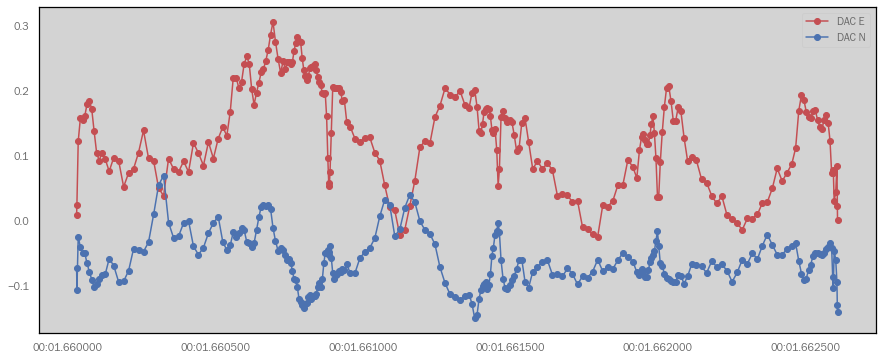

In [60]:
def _getDAC(data):
    ## Calculate full x-y dead reckoning during each dive
    def reset_transport_at_GPS(arr):
        ffill = lambda arr: pd.DataFrame(arr).fillna(method='ffill').values.flatten()
        ref = np.zeros(np.shape(arr)) * np.NaN
        ref[_gps] = arr[_gps]
        return (arr - ffill(ref))
    
    _gps = (data.data.DeadReckoning.values < 1) & (data.data.NAV_RESOURCE.values == 116)
    
    t = data.data.date_float.values * 1e-9
    heading = interp(ADCP['time'].values.astype('float'), ADCP['Heading'].values, data.data.date_float.values)
    vg_e = np.nan_to_num(data.data['speed_horz'] *np.sin( heading * np.pi/180 ))
    vg_n = np.nan_to_num(data.data['speed_horz'] *np.cos( heading * np.pi/180 ))
    
    data.data['speed_e'] = vg_e
    data.data['speed_n'] = vg_n
    
    de = np.cumsum(np.append(0, vg_e[1:] * np.diff(t)))
    dn = np.cumsum(np.append(0, vg_n[1:] * np.diff(t)))

    de = reset_transport_at_GPS(de)
    dn = reset_transport_at_GPS(dn)

    ## Calculate on per dive basis
    dnum = np.unique(data.data.diveNum.values)
    sidx = np.zeros(np.shape(dnum))*np.NaN
    didx = np.zeros(np.shape(dnum))*np.NaN
    
    for idx,dx in enumerate(dnum):
        try:
            sidx[idx] = np.flatnonzero((data.data.diveNum.values == dx) & _gps)[0]
            didx[idx] = np.flatnonzero((data.data.diveNum.values == dx) & _gps)[-1]
        except:
            continue
                        
    _gd = np.isfinite(sidx+didx+dnum)
    dnum = dnum[_gd]
    sidx = sidx[_gd]
    didx = didx[_gd]
    
    sidx = sidx.astype(int)
    didx = didx.astype(int)
   
    surf_lat = data.data.latitude.values[sidx]
    surf_lon = data.data.longitude[sidx]
    surf_time = t[sidx]

    dive_lat = data.data.latitude[didx]
    dive_lon = data.data.longitude[didx]
    dive_time = t[didx]

    dr_e = np.zeros(np.shape(dnum)) * np.NaN
    dr_n = np.zeros(np.shape(dnum)) * np.NaN
    gps_e = np.zeros(np.shape(dnum)) * np.NaN
    gps_n = np.zeros(np.shape(dnum)) * np.NaN
    dt = np.zeros(np.shape(dnum)) * np.NaN
    meant = np.zeros(np.shape(dnum)) * np.NaN

    lon2m = lambda x,y : gsw.distance([x,x+1],[y,y])
    lat2m = lambda x,y : gsw.distance([x,x],[y,y+1])
    
    for idx,dx in enumerate(dnum):
        try:
            dr_e[idx] = de[ sidx[idx+1]-1 ]
            dr_n[idx] = dn[ sidx[idx+1]-1 ]
            gps_e[idx] = (surf_lon[idx+1] - dive_lon[idx]) * lon2m(dive_lon[idx],dive_lat[idx])
            gps_n[idx] = (surf_lat[idx+1] - dive_lat[idx]) * lat2m(dive_lon[idx],dive_lat[idx])
            dt[idx] = surf_time[idx+1] - dive_time[idx]
            meant[idx] = (surf_time[idx+1] + dive_time[idx])/2
        except:
            print('No final GPS for dive '+str(dx))

    dac_e = (gps_e-dr_e)/dt
    dac_n = (gps_n-dr_n)/dt
    
    plt.figure(figsize=(15,6))
    plt.plot(pd.to_datetime(meant),dac_e,'o-r')
    plt.plot(pd.to_datetime(meant),dac_n,'o-b')
    plt.legend(('DAC E','DAC N'))

    data.data['DAC_E'] = interp(meant, (gps_e-dr_e)/dt, t)
    data.data['DAC_N'] = interp(meant, (gps_n-dr_n)/dt, t)
    
    data.data['DAC_E'] = data.data['DAC_E'].fillna(method='bfill').fillna(method='ffill')
    data.data['DAC_N'] = data.data['DAC_N'].fillna(method='bfill').fillna(method='ffill')
    
_getDAC(data)

Text(0.5, 1.0, 'North')

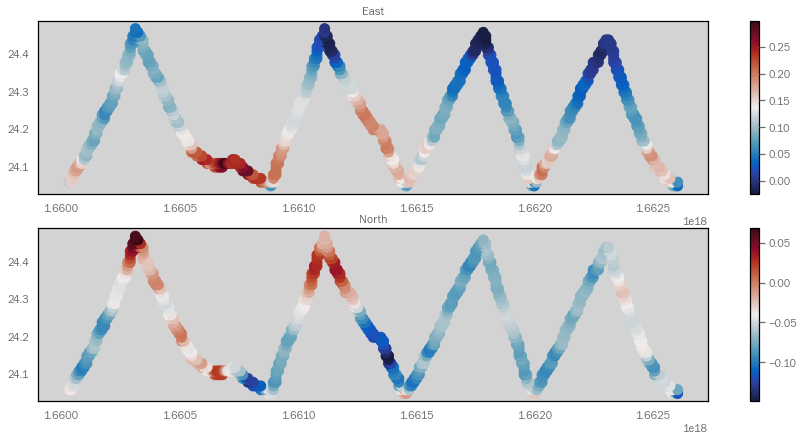

In [61]:
plt.figure(figsize=(15,7))

E,X,Y = sx.grid2d(data.data.Timestamp.values.astype('float'), data.data.latitude, data.data.DAC_E, xi= 10**9 * 60 * 60 * 3, yi=0.01)

N,X,Y = sx.grid2d(data.data.Timestamp.values.astype('float'), data.data.latitude, data.data.DAC_N, xi= 10**9 * 60 * 60 * 3, yi=0.01)

plt.subplot(211)
plt.scatter(X, Y, 100, E, cmap=cmo.balance)
plt.colorbar()
plt.title('East')

plt.subplot(212)
plt.scatter(X, Y, 100, N, cmap=cmo.balance)
plt.colorbar()
plt.title('North')

## 5.3. Get surface drift

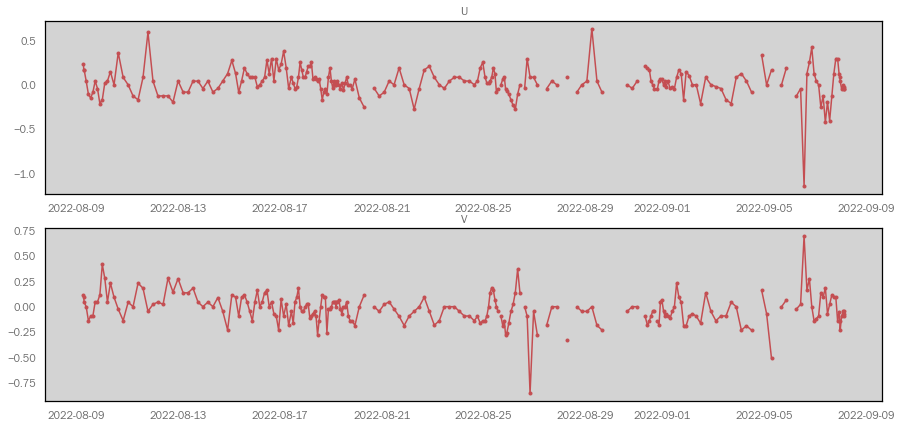

In [118]:
def getSurfaceDrift():
    _gps = (data.data.DeadReckoning.values < 1) & (data.data.NAV_RESOURCE.values == 116)
    
    lon2m = lambda x,y : gsw.distance([x,x+1],[y,y])
    lat2m = lambda x,y : gsw.distance([x,x],[y,y+1])
    
    dnum = data.data.diveNum.values[_gps]
    
    lons = data.data.longitude.values[_gps]
    lats = data.data.latitude.values[_gps]
    
    dlons = np.gradient(lons)
    dlats = np.gradient(lats)
        
    for idx in range(len(lons)):
        dlons[idx] = dlons[idx] * lon2m(lons[idx],lats[idx])
        dlats[idx] = dlats[idx] * lat2m(lons[idx],lats[idx])
    
    times = data.data.Timestamp.values.astype('float')[_gps] / 10**9
    dtimes = np.gradient(times)
    
    dE = np.full(int(np.nanmax(data.data.diveNum)), np.NaN)
    dN = np.full(int(np.nanmax(data.data.diveNum)), np.NaN)
    dT = np.full(int(np.nanmax(data.data.diveNum)), np.NaN)
    
    for idx in range(len(dE)):
        _gd = (dtimes < 21) & (dnum == idx+1)
        dE[idx] = np.nanmedian(dlons[_gd]/dtimes[_gd])
        dN[idx] = np.nanmedian(dlats[_gd]/dtimes[_gd])
        dT[idx] = np.nanmean(times[_gd])
    
    dT = dT * 10**9
    
    plt.figure(figsize=(15,7))
    plt.subplot(211)
    plt.plot(pd.to_datetime(dT),dE,'.-r')
    plt.title('U')
    plt.subplot(212)
    plt.plot(pd.to_datetime(dT),dN,'.-r')
    plt.title('V')
    
    return dE,dN,dT
    
    
dE,dN,dT = getSurfaceDrift()

## 5.4. Get bottom track data

In [63]:
def _process(ADCP):
    def sin(x):
        return np.sin(np.deg2rad(x))
    def cos(x):
        return np.cos(np.deg2rad(x))
    # BT gives us speed of the glider
    # If we subtract BT velocity from XYZ
    # then we get speed of water
    BT = xr.open_mfdataset(adcp_path,group='Data/AverageBT')

    thresh = 12

    ind = (BT['VelocityBeam1'] > -2) & (BT['VelocityBeam2'] > -2) & (BT['VelocityBeam4'] > -2)
    ind2 = (BT['FOMBeam1'] < thresh) & (BT['FOMBeam2'] < thresh) & (BT['FOMBeam4'] < thresh)
    BT = BT.isel(time=ind & ind2)
    
    full_time = ADCP['time'].values.astype('float')
    BT_time = BT['time'].values.astype('float')
    matching = []
    for idx in tqdm(range(len(BT_time))):
        matching.append( np.argmin( np.abs(BT_time[idx]-full_time) ) )
        
    ADCP_profile = ADCP['profileNum'].values.copy()
    ADCP_depth = ADCP['Pressure'].values.copy()
    for idx in range( np.nanmax(ADCP_profile).astype(int) ):
        _gd = (ADCP_profile == idx)
        if np.count_nonzero(_gd) == 0:
            print('Profile '+str(idx)+' was empy')
        else:
            ADCP_depth[_gd] = np.nanmax(ADCP_depth[_gd])
    ADCP_depth = ADCP_depth[matching]
    
    
    _gd = (np.abs(ADCP_depth-BT['Pressure']).values < 15)
    BT = BT.isel(time=_gd)
    full_time = ADCP['time'].values.astype('float')
    BT_time = BT['time'].values.astype('float')
    matching = []
    for idx in tqdm(range(len(BT_time))):
        matching.append( np.argmin( np.abs(BT_time[idx]-full_time) ) )
    
    C_old = BT['SpeedOfSound'].values
    C_new = ADCP['SpeedOfSound'].isel(time=matching).values
    
    a = 47.5 # Beam 1 and 3 angle from Z
    b = 25 # Beam 2 and 4 angle from Z
    xyz2beam_fore = np.array([
        [sin(a),0,cos(a)],
        [0,-sin(b),cos(b)],
        [0,sin(b),cos(b)]
    ])
    beam2xyz_fore = np.linalg.inv(xyz2beam_fore)
    
    BT_X4, BT_Y4, BT_Z4 = beam2xyz_fore @ np.array([
        BT['VelocityBeam1'] * (C_new/C_old),
        BT['VelocityBeam2'] * (C_new/C_old),
        BT['VelocityBeam4'] * (C_new/C_old),
        ])

    def M_xyz2enu(heading,pitch,roll):
        hh = np.pi*(heading-90)/180
        pp = np.pi*pitch/180
        rr = np.pi*roll/180

        _H = np.array([
            [np.cos(hh),np.sin(hh),0], 
            [-np.sin(hh),np.cos(hh),0], 
            [0,0,1]
        ])
        _P = np.array([
            [np.cos(pp), 0, -np.sin(pp)] ,
            [0, 1, 0] , 
            [ np.sin(pp), 0, np.cos(pp)]
        ])
        _R = np.array([
            [1, 0, 0] ,
            [0, np.cos(rr), -np.sin(rr)] , 
            [0, np.sin(rr), np.cos(rr)]
        ])

        _M = _H@_P@_R
        return _M

    H = BT['Heading'].values
    P = BT['Pitch'].values
    R = BT['Roll'].values

    BT_E = np.full_like(H,np.NaN)
    BT_N = np.full_like(H,np.NaN)
    BT_U = np.full_like(H,np.NaN)

    if top_mounted:
        direction = 1
    else:
        direction = -1

    n = len(BT_X4)
    for i in tqdm(range(n)):
        BT_E[i], BT_N[i], BT_U[i] = M_xyz2enu(H[i],P[i],R[i]) @ [BT_X4[i], BT_Y4[i]*direction, BT_Z4[i]*direction]   

    bt_e = np.full_like(full_time,np.NaN)
    bt_e[matching] = BT_E
    bt_n = np.full_like(full_time,np.NaN)
    bt_n[matching] = BT_N
    bt_u = np.full_like(full_time,np.NaN)
    bt_u[matching] = BT_U

    ADCP['BT_E'] = ('time', bt_e)
    ADCP['BT_N'] = ('time', bt_n)
    ADCP['BT_U'] = ('time', bt_u)
    
    return ADCP
    
ADCP = _process(ADCP)

100%|█████████████████████████████████████| 2676/2676 [00:08<00:00, 319.54it/s]


Profile 0 was empy


100%|███████████████████████████████████| 1004/1004 [00:00<00:00, 31399.73it/s]


## 5.5. Reference ADCP data

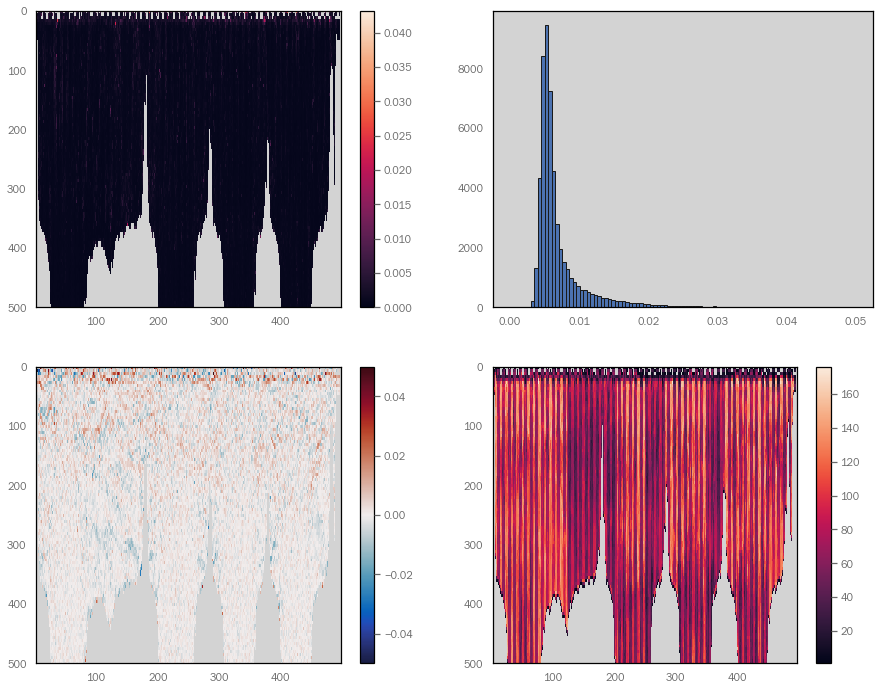

In [64]:
def verify():
    x = np.arange(0,np.shape(ADCP.Sh_E.values)[0],1)

    SHEm,XI,YI = sx.grid2d(
        np.tile(ADCP.profileNum.values, (len(ADCP.gridded_bin), 1)).T[x,:].flatten(),
        ADCP.bin_depth.values[x,:].flatten(), 
        ADCP.Sh_E.values[x,:].flatten(), 
        xi=1, yi=5, fn='mean')
    SHEs,XI,YI = sx.grid2d(
        np.tile(ADCP.profileNum.values, (len(ADCP.gridded_bin), 1)).T[x,:].flatten(),
        ADCP.bin_depth.values[x,:].flatten(), 
        ADCP.Sh_E.values[x,:].flatten(), 
        xi=1, yi=5, fn='std')
    SHEn,XI,YI = sx.grid2d(
        np.tile(ADCP.profileNum.values, (len(ADCP.gridded_bin), 1)).T[x,:].flatten(),
        ADCP.bin_depth.values[x,:].flatten(), 
        ADCP.Sh_E.values[x,:].flatten(), 
        xi=1, yi=5, fn='count')

    plt.figure(figsize=(15,12))

    plt.subplot(221)
    plt.pcolormesh(XI,YI,SHEs/np.sqrt(SHEn))
    plt.colorbar()
    # plt.clim([0,300])
    plt.ylim([0,500])
    plt.gca().invert_yaxis()

    plt.subplot(223)
    plt.pcolormesh(XI,YI,SHEm,cmap=cmo.balance)
    plt.colorbar()
    plt.ylim([0,500])
    plt.clim([-0.05,0.05])
    plt.gca().invert_yaxis()

    plt.subplot(224)
    plt.pcolormesh(XI,YI,SHEn)
    plt.colorbar()
    plt.ylim([0,500])
    # plt.clim([0,0.01])
    plt.gca().invert_yaxis()

    plt.subplot(222)
    _ = plt.hist(SHEs.flatten(), np.linspace(0,0.05,100))
    
verify()

D:\miniconda3\envs\py3.10\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\miniconda3\envs\py3.10\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


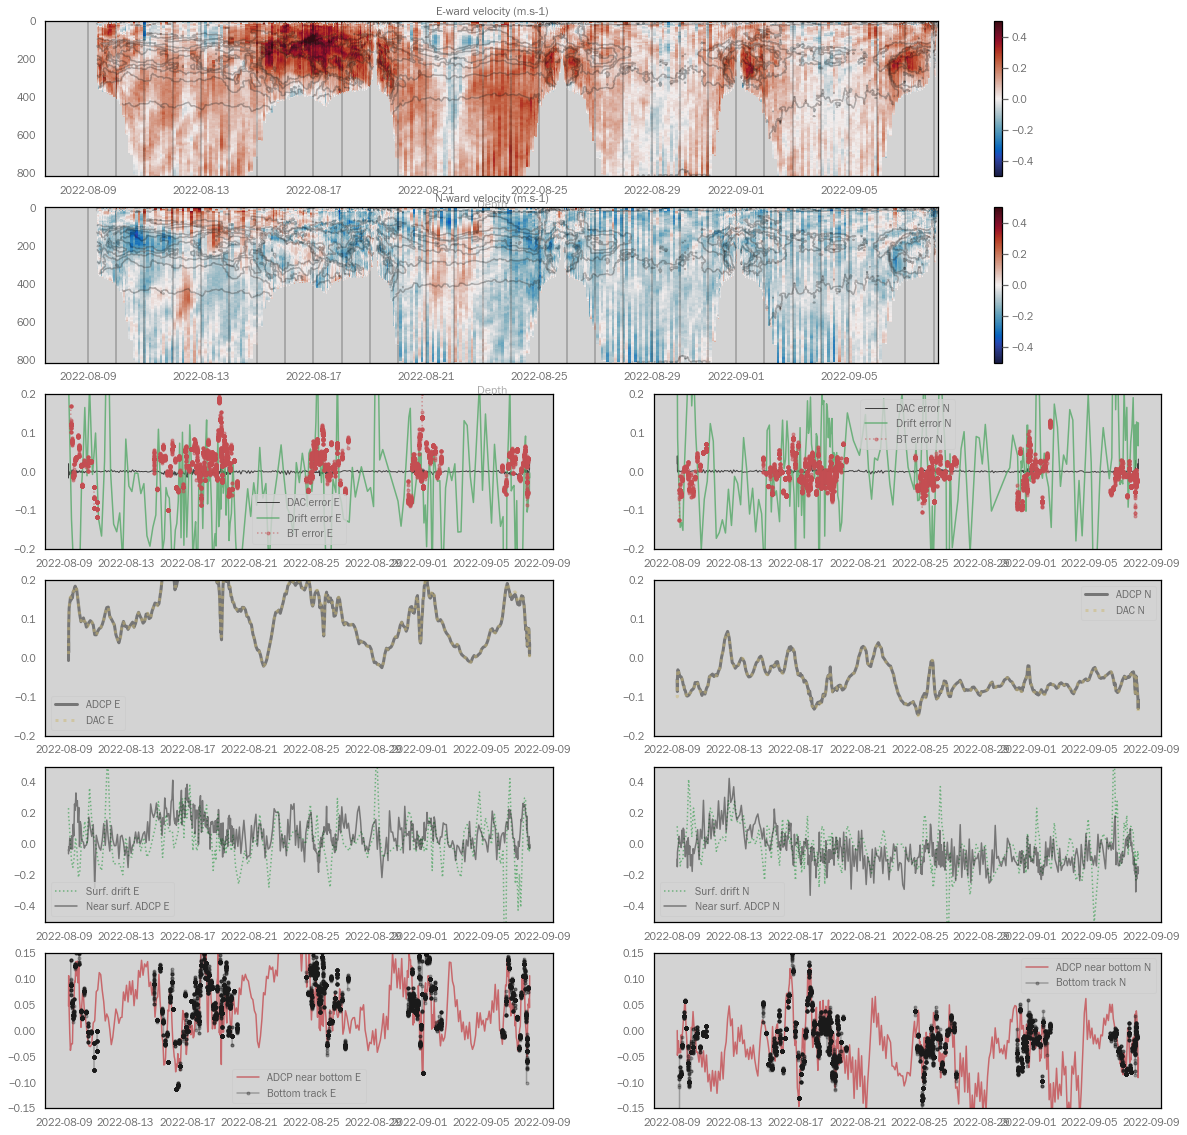

In [121]:
def _verify():
    var = ['E','N']
    
    plt.figure(figsize=(20,20))
    
    days = np.unique(data.data.Timestamp.round('D'))
    for pstep in range(len(var)):
        
        letter = var[pstep]
        # Grid shear to average out sensor + zooplankton noise
        Sh,XI,YI = sx.grid2d(
            np.tile(ADCP.profileNum.values, (len(ADCP.gridded_bin), 1)).T.flatten(),
            ADCP.bin_depth.values.flatten(), 
            ADCP['Sh_'+letter].values.flatten(), 
            xi=xaxis, yi=yaxis, fn='mean')

        # Integrate shear vertically
        _bd = ~np.isfinite(Sh) # Preserve what are originally NaN values to recover later as need conversion to 0 for cumsum-
        Sh = np.nan_to_num(Sh) # Replace NaNs with 0 for cumsum
        V = np.cumsum(Sh,axis=0)*y_res # Cumulative sum of shear to recover velocity profile
        V[_bd] = np.NaN # Return NaNs to their rightful place.
        V = V - np.tile(np.nanmean(V, axis=0), (np.shape(V)[0],1)) # Make mean of baroclinic profiles equal to 0

        # Grid DAC
        DAC,XI,YI = sx.grid2d(
            data.data.profileNum.values,
            data.data.LEGATO_PRESSURE.values, 
            data.data['DAC_'+letter].values, 
            xi=xaxis, yi=yaxis, fn='mean')

        # Grid vertical speed
        dPdz,XI,YI = sx.grid2d(
            data.data.profileNum.values,
            data.data.LEGATO_PRESSURE.values, 
            data.data['speed_vert'].values, 
            xi=xaxis, yi=yaxis, fn='mean')

        # Grid salinity
        SA,XI,YI = sx.grid2d(
            data.data.profileNum.values,
            data.data.LEGATO_PRESSURE.values, 
            data.data.sa.values, 
            xi=xaxis, yi=yaxis, fn='median')

        # Seconds spent in each depth bin, to weight referencing
        SpB = y_res / dPdz
        SpB[np.isinf(SpB)] = 0
        strictness = 1
        SpB_std = np.nanstd(SpB.flatten())
        SpB[ np.abs(SpB) > (strictness*SpB_std) ] = strictness*SpB_std

        # Baroclinic velocity, weighted by depth residence time, should be equal to DAC
        # So the reference to add to a baroclinic profile of mean = 0 is the DAC - the weighted baroclinic velocity.    
        Ref = np.nanmean(DAC, axis=0)  -  np.nansum(V*SpB, axis=0)/np.nansum(SpB, axis=0)

        # Now we reference the velocity
        V = V +  np.tile(Ref, (np.shape(V)[0],1))
        out['ADCP_'+letter] = V

        ## PLOT 1
        plt.subplot(6,1, pstep+1)
        plt.pcolormesh(taxis,yaxis,V,cmap=cmo.balance,shading='auto')
        plt.clim(np.array([-1,1])*0.5)
        plt.colorbar()
        [plt.axvline(x, color='k', alpha=0.3) for x in days]
        plt.contour(taxis,yaxis,SA,np.linspace(35.5,38.5,6),colors='k',alpha=0.3)
        plt.gca().invert_yaxis()
        plt.xlabel('Yo number')
        plt.xlabel('Depth')
        plt.title(letter+'-ward velocity (m.s-1)')
        
        ## PLOT 3
        plt.subplot(6,2, pstep+7)
        plt.plot(taxis,np.nanmean(V, axis=0),'-k',alpha=0.5, linewidth=3)
        plt.plot(taxis,np.nanmean(DAC, axis=0),':y',alpha=0.5, linewidth=3)
        plt.legend(('ADCP '+letter,'DAC '+letter))
        plt.ylim([-0.2,0.2])
        
        ## PLOT 4
        plt.subplot(6,2, pstep+9)
        max_depth = 26
        _gd = np.isfinite(dN+dE)
        if pstep==0:
            plt.plot(pd.to_datetime(dT[_gd]),dE[_gd],':g', alpha=0.8)
        else:
            plt.plot(pd.to_datetime(dT[_gd]),dN[_gd],':g', alpha=0.8)   
        V_surf = np.nanmean(V[:max_depth,:], axis=0)
        plt.plot(taxis[np.isfinite(V_surf)],V_surf[np.isfinite(V_surf)],'-k',alpha=0.5)
        plt.legend(('Surf. drift '+letter,'Near surf. ADCP '+letter))
        plt.ylim([-0.5,0.5])
    
        ## PLOT 5
        plt.subplot(6,2, pstep+11)
        
        indices = np.flip(np.cumsum(np.flip(np.full_like(V,1)*np.isfinite(V),axis=0),axis=0),axis=0)
        indices[indices > 10] = np.NaN
        indices[np.isfinite(indices)] = 1
        bottom_V = np.nanmean(V*indices, axis=0)   
        plt.plot(taxis,RunningMean(bottom_V,1),'-r',alpha=0.8)
        
        ind = np.arange(len(ADCP['time'])) #np.isfinite(ADCP['BT_'+letter].values)
        bt_t = ADCP['time'].isel(time=ind).values
        bt = (ADCP[letter]-ADCP['BT_'+letter]).isel(time=ind).mean('gridded_bin').values
        bt_std = (ADCP[letter]-ADCP['BT_'+letter]).isel(time=ind).std('gridded_bin').values
    
        bt_smooth = 30
        plt.plot( bt_t , RunningMean(bt,bt_smooth), '-k', marker='.', alpha=0.3)
        plt.ylim([-0.15,0.15])
        plt.legend(('ADCP near bottom '+letter,'Bottom track '+letter))
        
        
        ## PLOT 2
        plt.subplot(6,2, pstep+5)
        plt.plot(taxis,np.nanmean(V, axis=0) - np.nanmean(DAC, axis=0),'-k',alpha=0.8, linewidth=1)
        
        if pstep==0:
            plt.plot(pd.to_datetime(dT[_gd]),dE[_gd] - interp(taxis[np.isfinite(V_surf)].values.astype('float'),V_surf[np.isfinite(V_surf)],dT[_gd]) ,'-g', alpha=0.8)
        else:
            plt.plot(pd.to_datetime(dT[_gd]),dN[_gd] - interp(taxis[np.isfinite(V_surf)].values.astype('float'),V_surf[np.isfinite(V_surf)],dT[_gd]),'-g', alpha=0.8)   
        
        plt.plot( bt_t , RunningMean(bt,bt_smooth) - interp(taxis.values.astype('float'),RunningMean(bottom_V,1) , bt_t.astype('float')), ':r', marker='.', alpha=0.5)
        
        plt.legend(('DAC error '+letter,'Drift error '+letter,'BT error '+letter))
        plt.ylim([-0.2,0.2])
        
        
    plt.savefig(filename[:filename.rfind('/')+1]+'currents.png', bbox_inches='tight')
    
_verify()

# VI. Grid and plot data

In [66]:
def _grid_glider_data(data): 
    exclude_from_grid = ['AD2CP_ALT', 'AD2CP_HEADING', 'AD2CP_PITCH', 'AD2CP_PRESSURE',
    'AD2CP_ROLL', 'AROD_FT_DO', 'AROD_FT_TEMP', 'Altitude', 'AngCmd',
    'AngPos', 'BallastCmd', 'BallastPos', 'DeadReckoning', 'Declination',
    'Depth', 'DesiredH','LinCmd', 'LinPos','NAV_DEPTH', 'NAV_LATITUDE', 'NAV_LONGITUDE',
    'NAV_RESOURCE', 'NavState', 'Pa', 'Pitch', 'Roll', 'Heading', 'SecurityLevel', 'Temperature',
    'Timestamp', 'Unnamed: 22', 'Unnamed: 28', 'Voltage', 'missionNum','Lat','Lon']

    variables = data.columns
    variables = [x for x in variables if x not in exclude_from_grid]
    grid = lambda name : sx.grid2d(data.profileNum.values, data.LEGATO_PRESSURE.values, data[name].values, xi=xaxis, yi=yaxis, fn='mean')[0]

    for varname in tqdm(variables):
        try:
            out[varname] = grid(varname)
        except:
            print('Variable "'+varname+'" failed to grid.')

    return out

In [67]:
ADCP_pnum = np.tile(ADCP.profileNum, (len(ADCP.gridded_bin),1)).T
out['Sh_E'] = sx.grid2d(ADCP_pnum.flatten(), ADCP.bin_depth.values.flatten(), ADCP.Sh_E.values.flatten(), xi=xaxis, yi=yaxis, fn='mean')[0]
out['Sh_N'] = sx.grid2d(ADCP_pnum.flatten(), ADCP.bin_depth.values.flatten(), ADCP.Sh_N.values.flatten(), xi=xaxis, yi=yaxis, fn='mean')[0]
out['Sh_U'] = sx.grid2d(ADCP_pnum.flatten(), ADCP.bin_depth.values.flatten(), ADCP.Sh_U.values.flatten(), xi=xaxis, yi=yaxis, fn='mean')[0]
out['Heading'] = sx.grid2d(ADCP.profileNum.values, ADCP.Pressure.values, ADCP['Heading'].values, xi=xaxis, yi=yaxis, fn='mean')[0]
out['Pitch'] = sx.grid2d(ADCP.profileNum.values, ADCP.Pressure.values, ADCP['Pitch'].values, xi=xaxis, yi=yaxis, fn='mean')[0]
out['Roll'] = sx.grid2d(ADCP.profileNum.values, ADCP.Pressure.values, ADCP['Roll'].values, xi=xaxis, yi=yaxis, fn='mean')[0]

out = _grid_glider_data(data.data)

# out['ABS'] = sx.grid2d(ADCP_pnum.flatten(), ADCP.bin_depth.values.flatten(), 
#                           (ADCP.A1.values.flatten()+ADCP.A2.values.flatten()+ADCP.A3.values.flatten()+ADCP.A4.values.flatten())/4,
#                           xi=xaxis, yi=yaxis, fn='mean')[0]


100%|██████████████████████████████████████████| 40/40 [00:18<00:00,  2.19it/s]


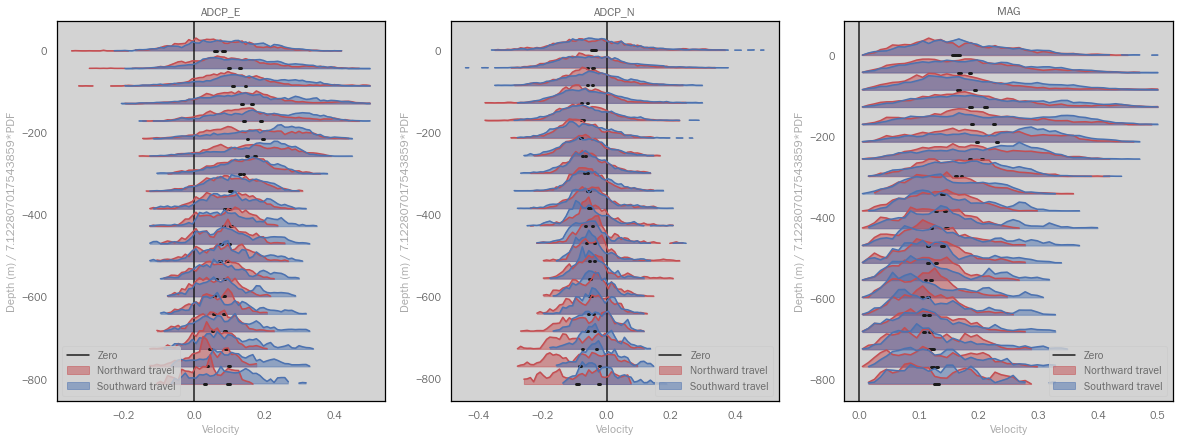

In [68]:
def verify_depth_bias(E='ADCP_E',N='ADCP_N'):
    
    north = np.gradient(out['latitude'],axis=1) > 0
    south = np.gradient(out['latitude'],axis=1) < 0
    
    up = np.remainder(out['profileNum'],2) == 0
    down = np.remainder(out['profileNum'],2) == 1
    
    
    depths = np.linspace(0,np.max(yaxis)-5,20)
    drange = np.mean(np.diff(depths))/2
    bins = np.linspace(-1,1,100) * 0.5
    
    variables = [E,N]
    
    plt.figure(figsize=(20,7))
    
    SF = drange/3
    
    for idx,var in enumerate(variables):
        plt.subplot(1,3,idx+1)
        plt.axvline(0,color='k')

        for idx, d in enumerate(depths):
            depth = (np.abs(out['LEGATO_PRESSURE'] - d) < drange)
            
            Nvals = out[var][(north & depth)]
            Svals = out[var][(south & depth)]
            N,_ = np.histogram(Nvals,bins=bins,density=True)
            S,_ = np.histogram(Svals,bins=bins,density=True)

            Nm = np.nanmean(Nvals)
            Sm = np.nanmean(Svals)
            Ns = np.nanstd(Nvals)
            Ss = np.nanstd(Svals)
            Nn = np.count_nonzero(np.isfinite(Nvals))
            Sn = np.count_nonzero(np.isfinite(Svals))
            Nse = Ns / np.sqrt(Nn)
            Sse = Ss / np.sqrt(Sn)

            N[N==0] = np.NaN
            S[S==0] = np.NaN

            plt.fill_between(bins[1:],SF*N-float(d),-float(d),color='r',alpha=0.5)
            plt.fill_between(bins[1:],SF*S-float(d),-float(d),color='b',alpha=0.5)
            plt.plot(bins[1:],SF*N-float(d),'-r')
            plt.plot(bins[1:],SF*S-float(d),'-b')
        
            plt.plot([Nm-2*Nse,Nm+2*Nse],np.array([1,1])*-float(d),'-k',linewidth=3,alpha=1)
            plt.plot([Sm-2*Sse,Sm+2*Sse],np.array([1,1])*-float(d),'-k',linewidth=3,alpha=1)
            # plt.plot([Nm,Sm],np.array([1,1])*-float(d),'k',marker='.',linestyle='none')

        plt.ylabel('Depth (m) / '+str(SF)+'*PDF')
        plt.xlabel('Velocity')
        plt.legend(('Zero','Northward travel','Southward travel'))
        plt.title(var)
        
    plt.subplot(133)    
    plt.axvline(0,color='k')

    for idx, d in enumerate(depths):
        depth = (np.abs(out['LEGATO_PRESSURE'] - d) < drange)

        Nvals = np.sqrt(out['ADCP_E']**2 + out['ADCP_N']**2)[(north & depth)]
        Svals = np.sqrt(out['ADCP_E']**2 + out['ADCP_N']**2)[(south & depth)]
        N,_ = np.histogram(Nvals,bins=bins,density=True)
        S,_ = np.histogram(Svals,bins=bins,density=True)

        Nm = np.nanmean(Nvals)
        Sm = np.nanmean(Svals)
        Ns = np.nanstd(Nvals)
        Ss = np.nanstd(Svals)
        Nn = np.count_nonzero(np.isfinite(Nvals))
        Sn = np.count_nonzero(np.isfinite(Svals))
        Nse = Ns / np.sqrt(Nn)
        Sse = Ss / np.sqrt(Sn)

        N[N==0] = np.NaN
        S[S==0] = np.NaN

        plt.fill_between(bins[1:],SF*N-float(d),-float(d),color='r',alpha=0.5)
        plt.fill_between(bins[1:],SF*S-float(d),-float(d),color='b',alpha=0.5)
        plt.plot(bins[1:],SF*N-float(d),'-r')
        plt.plot(bins[1:],SF*S-float(d),'-b')
        
        plt.plot([Nm-2*Nse,Nm+2*Nse],np.array([1,1])*-float(d),'-k',linewidth=3,alpha=1)
        plt.plot([Sm-2*Sse,Sm+2*Sse],np.array([1,1])*-float(d),'-k',linewidth=3,alpha=1)
        # plt.plot([Nm,Sm],np.array([1,1])*-float(d),'k',marker='.',linestyle='none')

    plt.ylabel('Depth (m) / '+str(SF)+'*PDF')
    plt.xlabel('Velocity')
    plt.legend(('Zero','Northward travel','Southward travel'))
    plt.title('MAG')

    plt.savefig(filename[:filename.rfind('/')+1]+'ADCP_dsitribution.png', bbox_inches='tight')

    return None

verify_depth_bias()

In [69]:
# # Robert Todd method

# def get_bias(C):
#     bias = yaxis*C/np.max(yaxis) 
#     bias = bias-np.mean(bias)
#     return np.tile(bias,[len(taxis),1]).T

# def M_xyz2enu(heading,pitch,roll):
#     hh = np.pi*(heading-90)/180
#     pp = np.pi*pitch/180
#     rr = np.pi*roll/180

#     _H = np.array([
#         [np.cos(hh),np.sin(hh),0], 
#         [-np.sin(hh),np.cos(hh),0], 
#         [0,0,1]
#     ])
#     _P = np.array([
#         [np.cos(pp), 0, -np.sin(pp)] ,
#         [0, 1, 0] , 
#         [ np.sin(pp), 0, np.cos(pp)]
#     ])
#     _R = np.array([
#         [1, 0, 0] ,
#         [0, np.cos(rr), -np.sin(rr)] , 
#         [0, np.sin(rr), np.cos(rr)]
#     ])

#     _M = _H@_P@_R
#     return _M

# X_bias = get_bias(0.1)
# Y_bias = get_bias(0.5)

# if top_mounted:
#     direction = 1
# else:
#     direction = -1

# # E = ADCP['X'].values.copy()
# # N = ADCP['Y'].values.copy()*direction
# # U = ADCP['Z'].values.copy()*direction

# r,c = np.shape(X_bias)

# X = X_bias.flatten()
# Y = Y_bias.flatten()
# H = out['Heading'].flatten()
# P = out['Pitch'].flatten()
# R = out['Roll'].flatten()

# E_bias = np.full(len(X),np.NaN)
# N_bias = np.full(len(X),np.NaN)
# U_bias = np.full(len(X),np.NaN)

# for i in tqdm(range(len(X))):
#     E_bias[i], N_bias[i], _ = M_xyz2enu(H[i],P[i],R[i]) @ [X[i], Y[i], 0]

# E_bias = np.reshape(E_bias, (r,c))
# N_bias = np.reshape(N_bias, (r,c))

# out['ADCP_E_corr'] = out['ADCP_E'] + E_bias
# out['ADCP_N_corr'] = out['ADCP_N'] + N_bias


# verify_depth_bias(E = 'ADCP_E_corr', N = 'ADCP_N_corr')

 27%|███████████                              | 27/100 [00:01<00:05, 13.79it/s]
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1920421705.py:33: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(np.nanvar(ADCP_E_old, axis=1),yaxis,'-k')
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1920421705.py:34: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(np.nanvar(out['ADCP_E'], axis=1),yaxis,'-y')
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1920421705.py:36: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(np.nanvar(ADCP_N_old, axis=1),yaxis,'-k')
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1920421705.py:37: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(np.nanvar(out['ADCP_N'], axis=1),yaxis,'-y')
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1920421705.py:39: RuntimeWarning: Degrees of freedom <= 0 for slice.
  plt.plot(np.nanvar(np.sqrt(ADCP_E_old**2 + ADCP_N_old**2), axis=1),yaxis,'-k')
C:\Users\bastien

Optimization terminated successfully.
         Current function value: 234037.075866
         Iterations: 27
         Function evaluations: 54
(array([0.00038929]), 234037.07586626205, 27, 54, 0)


D:\miniconda3\envs\py3.10\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\miniconda3\envs\py3.10\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


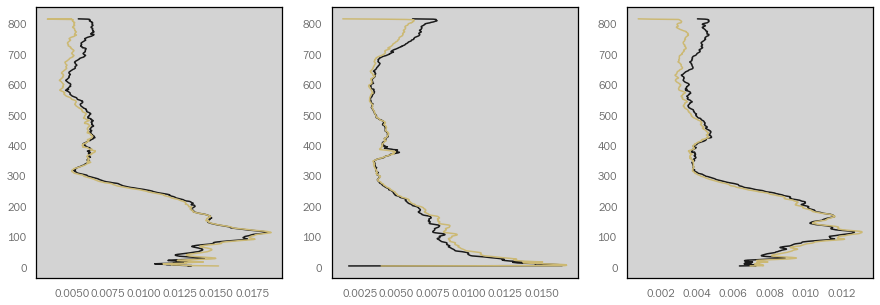

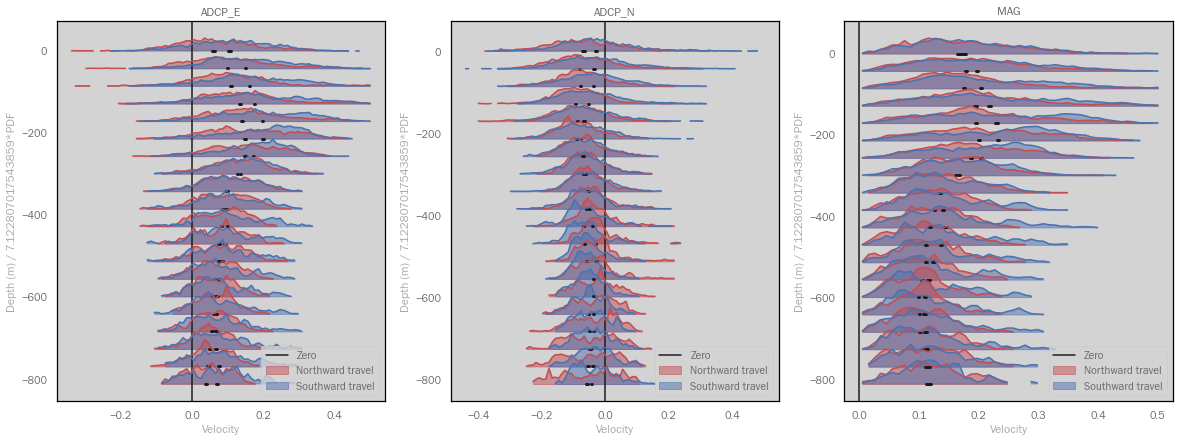

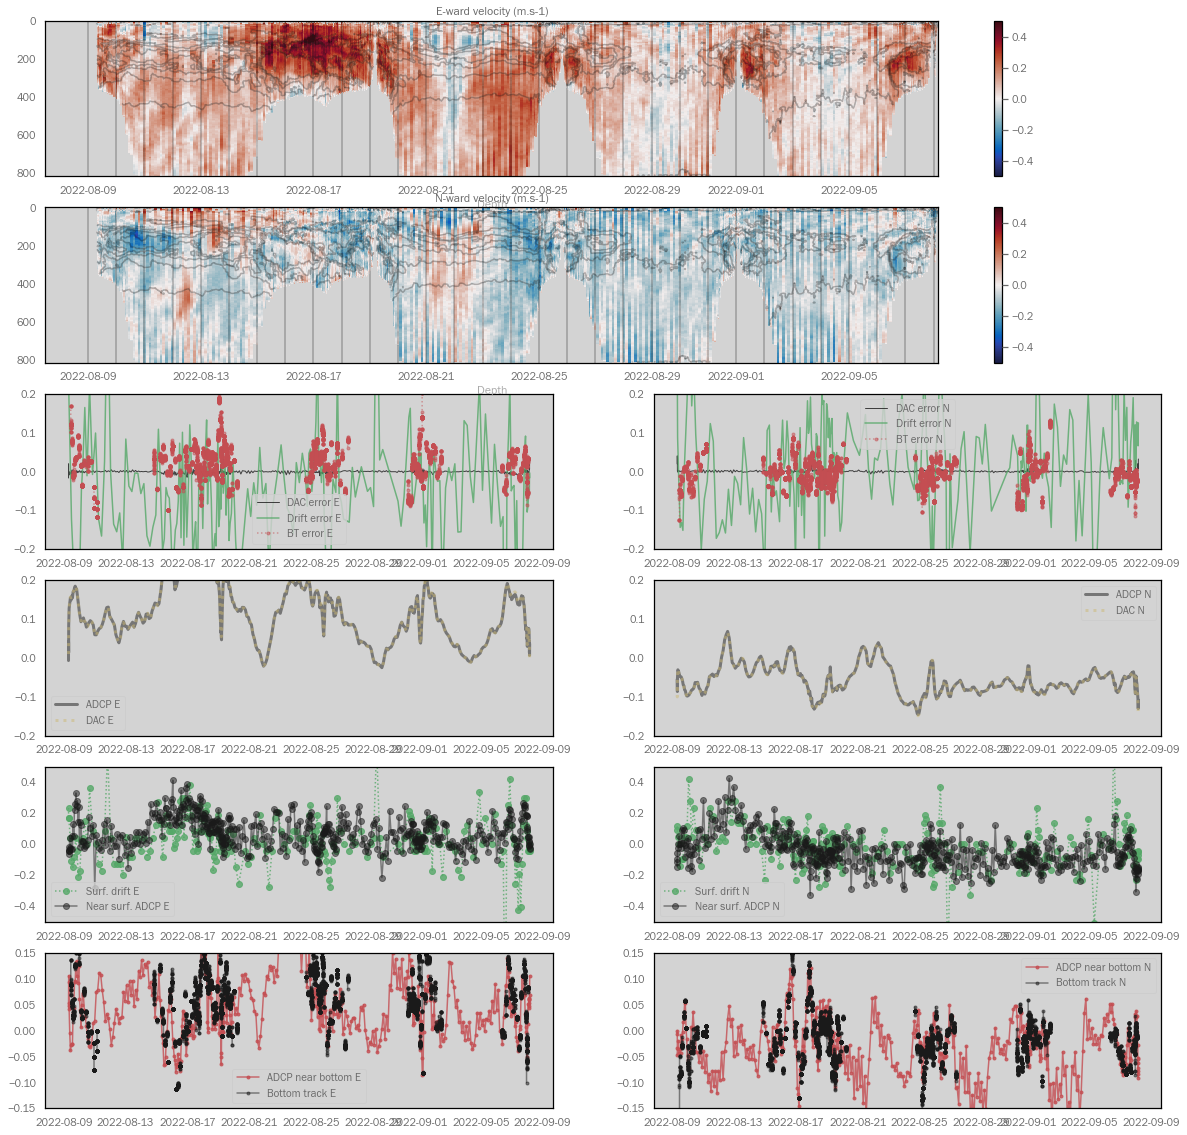

In [110]:
def get_bias(glider_speed, coeff):
    r,c = np.shape(glider_speed)
    bias = np.nancumsum(glider_speed,axis=0)
    bias[~np.isfinite(glider_speed)] = np.NaN
    bias = bias - np.tile(np.nanmean(bias, axis=0),[r,1])
    return bias*coeff

def score(E,N):
    rmsd_h = lambda x: np.sqrt(np.nanmean(x**2, axis=1))
    rmsd = lambda x: np.sqrt(np.nanmean(x**2))
    y_weighting = lambda x: x*0+1
    return rmsd((rmsd_h(E)+rmsd_h(N)) * y_weighting(yaxis))*1e6

def fn(coeff):
    return score(out['ADCP_E'] + get_bias(out['speed_e'], coeff),out['ADCP_N'] + get_bias(out['speed_n'], coeff))

from scipy.optimize import fmin
with tqdm(total=100) as pbar:
    def callbackF(Xi):
        pbar.update(1)
    R = fmin(fn, 1, callback=callbackF, disp=True, full_output=True, maxiter=100, ftol=0.00001)
print(R)
coeff = R[0]

ADCP_E_old = out['ADCP_E'].copy()
ADCP_N_old = out['ADCP_N'].copy()

out['ADCP_E'] = out['ADCP_E'] + get_bias(out['speed_e'], coeff)
out['ADCP_N'] = out['ADCP_N'] + get_bias(out['speed_n'], coeff)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.nanvar(ADCP_E_old, axis=1),yaxis,'-k')
plt.plot(np.nanvar(out['ADCP_E'], axis=1),yaxis,'-y')
plt.subplot(132)
plt.plot(np.nanvar(ADCP_N_old, axis=1),yaxis,'-k')
plt.plot(np.nanvar(out['ADCP_N'], axis=1),yaxis,'-y')
plt.subplot(133)
plt.plot(np.nanvar(np.sqrt(ADCP_E_old**2 + ADCP_N_old**2), axis=1),yaxis,'-k')
plt.plot(np.nanvar(np.sqrt(out['ADCP_E']**2 + out['ADCP_N']**2), axis=1),yaxis,'-y')

verify_depth_bias(E = 'ADCP_E', N = 'ADCP_N')

def test(out):
    out['ADCP_N'] = out['ADCP_N']
    out['ADCP_E'] = out['ADCP_E']
    _verify()
    
test(out)


In [111]:
def exportCSVfiles():
    for key in tqdm(out):
        print(key)
        np.savetxt(filename[:filename.rfind('/')+1]+key+'.csv', out[key], delimiter=",")
        
        plt.close('all')
        plt.figure(figsize=(14,5))
        plt.pcolormesh(taxis,yaxis,out[key],cmap=cmo.haline)
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.savefig(filename[:filename.rfind('/')+1]+key+'.png', bbox_inches='tight')

exportCSVfiles()

plt.close('all')

  0%|                                                   | 0/48 [00:00<?, ?it/s]

ADCP_E


  2%|▉                                          | 1/48 [00:00<00:45,  1.03it/s]

ADCP_N


  4%|█▊                                         | 2/48 [00:02<00:48,  1.06s/it]

Sh_E


  6%|██▋                                        | 3/48 [00:03<00:47,  1.05s/it]

Sh_N


  8%|███▌                                       | 4/48 [00:04<00:46,  1.06s/it]

Sh_U


 10%|████▍                                      | 5/48 [00:05<00:48,  1.13s/it]

Heading


 12%|█████▍                                     | 6/48 [00:06<00:47,  1.12s/it]

Pitch


 15%|██████▎                                    | 7/48 [00:07<00:45,  1.10s/it]

Roll


 17%|███████▏                                   | 8/48 [00:08<00:44,  1.12s/it]

FLBBPE_BB_700_COUNT


 19%|████████                                   | 9/48 [00:09<00:41,  1.06s/it]

FLBBPE_BB_700_SCALED


 21%|████████▊                                 | 10/48 [00:10<00:39,  1.04s/it]

FLBBPE_CHL_COUNT


 23%|█████████▋                                | 11/48 [00:11<00:37,  1.02s/it]

FLBBPE_CHL_SCALED


 25%|██████████▌                               | 12/48 [00:12<00:36,  1.00s/it]

FLBBPE_PE_COUNT


 27%|███████████▍                              | 13/48 [00:13<00:34,  1.01it/s]

FLBBPE_PE_SCALED


 29%|████████████▎                             | 14/48 [00:14<00:33,  1.02it/s]

LEGATO_CONDTEMP


 31%|█████████████▏                            | 15/48 [00:15<00:33,  1.01s/it]

LEGATO_CONDUCTIVITY


 33%|██████████████                            | 16/48 [00:16<00:32,  1.02s/it]

LEGATO_PRESSURE


 35%|██████████████▉                           | 17/48 [00:17<00:31,  1.01s/it]

LEGATO_SALINITY


 38%|███████████████▊                          | 18/48 [00:18<00:31,  1.05s/it]

LEGATO_TEMPERATURE


 40%|████████████████▋                         | 19/48 [00:19<00:30,  1.05s/it]

OCR504_Ed1


 42%|█████████████████▌                        | 20/48 [00:20<00:27,  1.02it/s]

OCR504_Ed2


 44%|██████████████████▍                       | 21/48 [00:21<00:25,  1.06it/s]

OCR504_Ed3


 46%|███████████████████▎                      | 22/48 [00:22<00:23,  1.12it/s]

OCR504_Ed4


 48%|████████████████████▏                     | 23/48 [00:23<00:21,  1.15it/s]

diveNum


 50%|█████████████████████                     | 24/48 [00:24<00:21,  1.14it/s]

longitude


 52%|█████████████████████▉                    | 25/48 [00:25<00:21,  1.09it/s]

latitude


 54%|██████████████████████▊                   | 26/48 [00:26<00:21,  1.03it/s]

profileNum


 56%|███████████████████████▋                  | 27/48 [00:27<00:20,  1.04it/s]

temperature


 58%|████████████████████████▌                 | 28/48 [00:28<00:19,  1.01it/s]

salinity


 60%|█████████████████████████▍                | 29/48 [00:29<00:20,  1.06s/it]

sa


 62%|██████████████████████████▎               | 30/48 [00:30<00:19,  1.07s/it]

ct


 65%|███████████████████████████▏              | 31/48 [00:31<00:18,  1.10s/it]

sigma0


 67%|████████████████████████████              | 32/48 [00:32<00:17,  1.09s/it]

soundspeed


 69%|████████████████████████████▉             | 33/48 [00:33<00:16,  1.08s/it]

depth


 71%|█████████████████████████████▊            | 34/48 [00:34<00:15,  1.11s/it]

date_float


 73%|██████████████████████████████▋           | 35/48 [00:36<00:14,  1.11s/it]

o2


 75%|███████████████████████████████▌          | 36/48 [00:37<00:13,  1.11s/it]

o2_sat


 77%|████████████████████████████████▍         | 37/48 [00:38<00:12,  1.12s/it]

aou


 79%|█████████████████████████████████▎        | 38/48 [00:39<00:10,  1.09s/it]

bbp_700


 81%|██████████████████████████████████▏       | 39/48 [00:40<00:09,  1.10s/it]

alpha


 83%|███████████████████████████████████       | 40/48 [00:41<00:08,  1.08s/it]

speed


 85%|███████████████████████████████████▉      | 41/48 [00:42<00:07,  1.12s/it]

speed_vert


 88%|████████████████████████████████████▊     | 42/48 [00:43<00:06,  1.12s/it]

speed_horz


 90%|█████████████████████████████████████▋    | 43/48 [00:44<00:05,  1.11s/it]

w_H2O


 92%|██████████████████████████████████████▌   | 44/48 [00:45<00:04,  1.10s/it]

speed_e


 94%|███████████████████████████████████████▍  | 45/48 [00:47<00:03,  1.14s/it]

speed_n


 96%|████████████████████████████████████████▎ | 46/48 [00:48<00:02,  1.17s/it]

DAC_E


 98%|█████████████████████████████████████████▏| 47/48 [00:49<00:01,  1.14s/it]

DAC_N


100%|██████████████████████████████████████████| 48/48 [00:50<00:00,  1.06s/it]


In [112]:
options

{'reprocessRawGliderData': True,
 'correctRBRLag': True,
 'correctADCPHeading': True,
 'ADCP_discardFirstBin': False,
 'ADCP_correlationThreshold': 50,
 'ADCP_amplitudeThreshold': 75,
 'ADCP_velocityThreshold': 0.7,
 'correctXshear': True,
 'correctYshear': False,
 'correctZshear': False,
 'correctZZshear': False}

# END OF FILE

In [71]:
def date2float(d, epoch=pd.to_datetime(0, utc=True, origin='unix', cache='False')):
    return (d - epoch).dt.total_seconds()

class ForceRegression(object):
    def __init__(self, time, sal, temp_ext, pres_ext, lon, lat, ballast, pitch, profile, navresource, E, N, U, **param):

        self.timestamp = time
        self.time = date2float(self.timestamp)
        self.external_pressure = pres_ext
        self.external_temperature = temp_ext
        self.longitude = lon
        self.latitude = lat
        self.profile = profile
        self.salinity = sal
        self.ballast = ballast/1000000 # m^3
        self.pitch = np.deg2rad(pitch) # rad
        self.navresource=navresource
        
        self.E = E
        self.N = N
        self.U = U
        
        self.speed = np.sqrt(E**2 + N**2 + U**2)
        self.accel = np.gradient(self.speed, self.time)
        
        # Rerefence parameters for scaling and initial guesses:
        self.param_reference = dict({
            'mass': 60, # Vehicle mass in kg
            'vol0': 0.06, # Reference volume in m**3, with ballast at 0 (with -500 to 500 range), at surface pressure and 20 degrees C
            'area_w': 0.24, # Wing surface area, m**2
            
            'Cd_0': 0.046, #
            'Cd_1': 2.3, #             
            'Cl': 2.0, # Negative because wrong convention on theta
              
            'comp_p': 4.7e-06, #1.023279317627415e-06, #Pressure dependent hull compression factor
            'comp_t': 8.9e-05, #1.5665248101730484e-04, # Temperature dependent hull compression factor
            
            'SSStau': 13, #characteristic response time of the glider in sec
            
            'lag_t': 0.7
        })        

        self.param = self.param_reference.copy()
        for k,v in param.items():
            self.param[k] = v
        self.param_initial = self.param
        
        self.depth = gsw.z_from_p(self.external_pressure,self.latitude) # m . Note depth (Z) is negative, so diving is negative dZdt
        self.dZdt = np.gradient(self.depth,self.time) # m.s-1        

        self.g = gsw.grav(self.latitude,self.external_pressure)
        
        self.SA = gsw.SA_from_SP(self.salinity, self.external_pressure, self.longitude, self.latitude)
        self.CT = gsw.CT_from_t(self.SA, self.external_temperature, self.external_pressure)
        self.rho = gsw.rho(self.SA, self.CT, self.external_pressure)

        ### Basic model
        # Relies on steady state assumption that buoyancy, weight, drag and lift cancel out when not accelerating.
        # F_B - cos(glide_angle)*F_L - sin(glide_angle)*F_D - F_g = 0 
        # cos(glide_angle)*F_L + sin(glide_angle)*F_D = 0
        
        ### Get good datapoints to regress over
        self._valid = np.full(np.shape(self.pitch),True)
        self._valid[self.external_pressure < 3] = False
        self._valid[np.abs(np.rad2deg(self.pitch)) < 10] = False
        self._valid[np.abs(np.rad2deg(self.pitch)) > 70] = False 
        self._valid[np.abs(np.gradient(self.dZdt,self.time)) > 0.005] = False # Accelerations
        self._valid[np.gradient(self.pitch,self.time)==0] = False # Rotation
        # self._valid = self._valid & ((navresource == 100) | (navresource == 117) ) #100=glider going down & 117=glider going up (=> not at surface or inflecting)
               
        # Do first pass regression on vol parameters, or volume and hydro?
        self.regression_parameters = ('vol0','Cd_0','Cd_1','Cl','comp_p','comp_t')
        # ('vol0','comp_p','comp_t','Cd_0','Cd_1','Cl', 'SSStau') # Has to be a tuple, requires a trailing comma if single element 
        
        print('Number of valid points: '+str(np.count_nonzero(self._valid))+' (out of '+str(len(self._valid))+')')
        
    ### Coefficients and settings
    @property        
    def mass(self):
        return self.param['mass']
    
    @property        
    def vol0(self):
        return self.param['vol0']
    
    @property        
    def comp_p(self):
        return self.param['comp_p']
    
    @property        
    def comp_t(self):
        return self.param['comp_t']
    
    
    ### Principal forces
    @property
    def volume(self):
        volume = self.ballast + self.vol0 * (1 - self.comp_p*(self.external_pressure) + self.comp_t*(self.external_temperature))
        # volume = (self.ballast + self.vol0) * np.exp(-self.comp_p*self.external_pressure   +   self.comp_t*(self.external_temperature-20))
        return volume
    
    @property
    def glide_angle(self):
        return self.pitch + self.alpha
    
    @property
    def alpha(self):
        return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch
    
    @property
    def F_B(self):
        return self.g * self.rho * self.volume
    
    @property
    def F_g(self):
        return self.mass * self.g
    
    @property
    def F_L(self):
        return np.cos(self.glide_angle) * (self.F_B - self.F_g)
    
    @property
    def F_D(self):
        return np.sin(self.glide_angle) * (self.F_B - self.F_g)
    
    @property
    def dynamic_pressure(self):
        return (1/2) * self.rho * self.speed**2
    
    
    
    
    
#     @property
#     def vert_dir(self):
#         return np.sign(self.F_B-self.F_g) #Positive is buoyancy force up & negative is buoyancy force down

#     @property
#     def F_L(self):
#         return self.dynamic_pressure * (self.Cl) * self.alpha

#     @property
#     def F_D(self):
#         return self.dynamic_pressure * (   self.Cd_0 + self.Cd_1*(self.alpha)**2 + self.Cd_a*(self.alpha)  )
#         # return self.dynamic_pressure * (   self.Cd_0 + self.Cd_1*(self.alpha)**2 )

#     @property
#     def Pa(self):
#         return self.external_pressure * 10000 # Pa

#     ### Important variables
#     @property
#     def glide_angle(self):
#         return self.pitch + self.alpha
    
#     @property
#     def dynamic_pressure(self):
#         return self.rho * self.area_w * self.speed**2 / 2

#     @property
#     def w_H2O(self):
#         # Water column upwelling
#         return self.dZdt - self.speed_vert
    
#     @property
#     def R1(self):
#         return np.sqrt(np.nanmean(   (1-self.tau)*self.w_H2O[self._valid]**2   +   self.tau*((self.speed_through_water - self.speed)[self._valid]**2)   ))
    
#     ### Basic equations    
#     def _solve_alpha(self):
#         _pitch_range = np.linspace( np.deg2rad(0), np.deg2rad(90) , 90)
#         _alpha_range1 = np.zeros_like(_pitch_range)
#         _alpha_range2 = np.zeros_like(_pitch_range)      
        
#         # Resolve for normal flight
#         for _istep, _pitch in enumerate(_pitch_range):
#             _tmp = fsolve(self._equation_alpha, 0.01, args=(_pitch), full_output=True)
#             _alpha_range1[_istep] = _tmp[0]
        
#         # Resolve for stall ## VERIFY WHAT THEY DID HERE
#         for _istep, _pitch in enumerate(_pitch_range):
#             if (np.sign(_pitch)>0) :
#                 _tmp = fsolve(self._equation_alpha, (-np.pi/2 -_pitch + 0.01), args=(_pitch), full_output=True)
#                 _alpha_range2[_istep] = _tmp[0]
#             else :
#                 _tmp = fsolve(self._equation_alpha, (np.pi/2 -_pitch - 0.01), args=(_pitch), full_output=True)
#                 _alpha_range2[_istep] = _tmp[0]
            
#         _interp_fn1 = interp1d(_pitch_range,_alpha_range1)
#         _interp_fn2 = interp1d(_pitch_range,_alpha_range2)
        
#         Res=_interp_fn1(np.abs(self.pitch)) * np.sign(self.pitch) #Résolution noramle
#         Res[self.vert_dir*np.sign(self.pitch)<0]=(_interp_fn2(np.abs(self.pitch)) * np.sign(self.pitch))[self.vert_dir*np.sign(self.pitch)<0] #Résolution décrochage
#         return Res
    
#     def _equation_alpha(self, _alpha, _pitch):
#         return ( self.Cd_0 + self.Cd_1 *(_alpha**2) ) / ( (self.Cl) * np.tan(_alpha + _pitch) ) - _alpha

#     def _solve_speed(self):
#         _dynamic_pressure = (self.F_B - self.F_g) * np.sin(self.glide_angle) / (   self.Cd_0 + self.Cd_1 * (self.alpha)**2   )
#         return np.sqrt(2 * _dynamic_pressure / self.rho / self.area_w)
    
#     def model_function(self):    
        
#         def fillGaps(x,y):
#             fill = lambda arr: pd.DataFrame(arr).fillna(method='bfill').fillna(method='ffill').values.flatten()
#             f = interp1d(x[np.isfinite(x+y)],y[np.isfinite(x+y)], bounds_error=False, fill_value=np.NaN)
#             return(fill(f(x)))

#         sos = signal.butter(1, 1/(2*np.pi*self.SSStau), 'lowpass', fs=1, output='sos') #order, cutoff frequency, "lowpass", sampling frequency,
#         _lowpassDynamics = lambda arr: signal.sosfilt(sos, arr)

        
#         #self.alpha = fillGaps(self.time, self._solve_alpha()) #
#         self.alpha = _lowpassDynamics(fillGaps(self.time, self._solve_alpha())) # Apply low pass to AOA ?
        
#         self.raw_speed = fillGaps(self.time, self._solve_speed())        
#         self.raw_speed [ (self.external_pressure < 1) & (self.navresource == 116) ] = 0 #Set speed to be zero at the surface ## TODO: Not a good way to do
        
#         self.speed = self.raw_speed #_lowpassDynamics(self.raw_speed)
#         self.speed_vert = np.sin(self.glide_angle)*self.speed
#         self.speed_horz = np.cos(self.glide_angle)*self.speed

#     def cost_function(self,x_initial):        
#         for _istep, _key in enumerate(self.regression_parameters):
#             self.param[_key] = x_initial[_istep] * self.param_reference[_key]
#         self.model_function()
#         return self.R1 
    
#     def regress(self, maxiter = 300):
#         x_initial = [self.param[_key] / self.param_reference[_key] for _istep,_key in enumerate(self.regression_parameters)]
#         print('Initial parameters: ', self.param)
#         print('Non-optimised score: '+str(self.cost_function(x_initial)) )
#         print('Regressing...')

#         with tqdm(total=maxiter) as pbar:
#             def callbackF(Xi):
#                 pbar.update(1)
#             R = fmin(self.cost_function, x_initial, callback=callbackF, disp=True, full_output=True, maxiter=maxiter, ftol=0.00001)
            
#         for _istep,_key in enumerate(self.regression_parameters):
#             self.param[_key] = R[0][_istep] * self.param_reference[_key]
        
#         x_initial = [self.param[_key] / self.param_reference[_key] for _istep,_key in enumerate(self.regression_parameters)]
#         print('Optimised parameters: ', self.param)
#         print('Final Optimised score: '+str(self.cost_function(x_initial)) )
#         self.model_function()
        

    
#     @property        
#     def area_w(self):
#         return self.param['area_w']
    
#     @property        
#     def Cd_0(self):
#         return self.param['Cd_0']
    
#     @property        
#     def Cd_1(self):
#         return self.param['Cd_1']
    
#     @property        
#     def Cl(self):
#         return self.param['Cl']
      
#     @property        
#     def SSStau(self):
#         return self.param['SSStau']
    
#     @property        
#     def lag_t(self):
#         return self.param['lag_t']

In [72]:
# time, sal, temp_ext, pres_ext, lon, lat, ballast, pitch, profile, navresource, E, N, U, **param):
# from scipy import signal
# sos = signal.butter(1, 1/(2*np.pi*  1  ), 'lowpass', fs=1, output='sos') #order, cutoff frequency, "lowpass", sampling frequency,
# filt = lambda arr: signal.sosfilt(sos, arr)
window = 1
filt = lambda arr, window : np.convolve(arr, np.ones(window)/window, mode='same')

force = ForceRegression(
       data.data.Timestamp, 
       data.data.salinity.interpolate('index').fillna(method='bfill').values, 
       data.data.temperature.interpolate('index').fillna(method='bfill').values, 
       data.data.LEGATO_PRESSURE.interpolate('index').fillna(method='bfill').values, 
       data.data.longitude.interpolate('index').fillna(method='bfill').values, 
       data.data.latitude.interpolate('index').fillna(method='bfill').values, 
       data.data.BallastPos.interpolate('index').fillna(method='bfill').values, 
       data.data.Pitch.interpolate('index').fillna(method='bfill').values, 
       data.data.profileNum.interpolate('nearest').fillna(method='bfill').values,
       data.data.NAV_RESOURCE.interpolate('nearest').fillna(method='bfill').values,
       interp(ADCP.time.values.astype('float'), filt(ADCP.E.mean(dim='gridded_bin', skipna=True).interpolate_na(dim='time').fillna(0).values, window), data.data.Timestamp.values.astype('float')),
       interp(ADCP.time.values.astype('float'), filt(ADCP.N.mean(dim='gridded_bin', skipna=True).interpolate_na(dim='time').fillna(0).values, window), data.data.Timestamp.values.astype('float')),
       interp(ADCP.time.values.astype('float'), filt(ADCP.U.mean(dim='gridded_bin', skipna=True).interpolate_na(dim='time').fillna(0).values, window), data.data.Timestamp.values.astype('float')),     
       mass=flight.mass, vol0=flight.vol0,
       comp_p=flight.comp_p, comp_t=flight.comp_t)

force._valid[data.data.LEGATO_PRESSURE < 5] = False

Number of valid points: 2228967 (out of 2580655)


D:\miniconda3\envs\py3.10\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


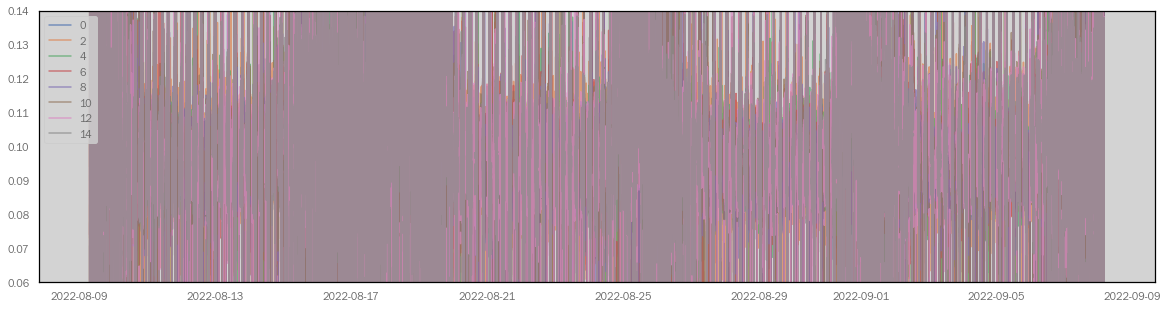

In [102]:
plt.figure(figsize=(20,5))

var = lambda ind : ADCP.U.isel(gridded_bin=ind).values

for idx in np.arange(0,16,2):
    try:
        plt.plot(ADCP.time.values, np.abs(var(idx)), '-', label=str(idx),alpha=0.7)
    except:
        continue

plt.axhline(0,color='k')
# plt.xlim([np.datetime64('2022-07-27'), np.datetime64('2022-07-27 06:00:00')])
plt.ylim([0.06,0.14])
plt.legend()

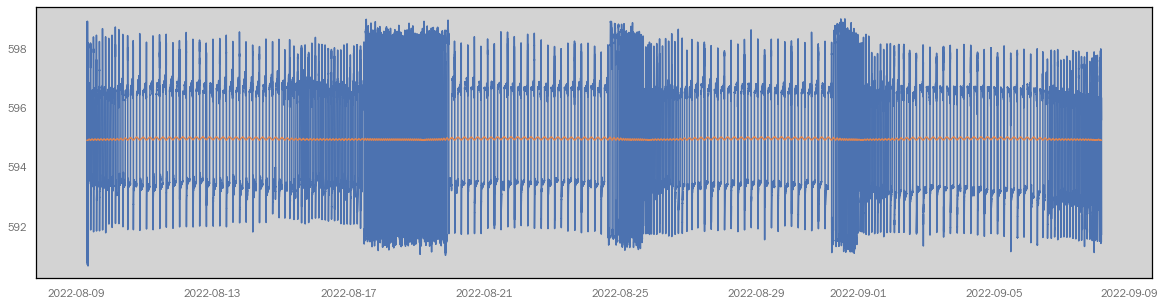

In [103]:
plt.figure(figsize=(20,5))

plt.plot(force.timestamp.values,force.F_B)
plt.plot(force.timestamp.values,force.F_g)
# plt.xlim([np.datetime64('2022-07-27'), np.datetime64('2022-07-27 06:00:00')])

C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1554315448.py:109: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch


(-15.0, 15.0)

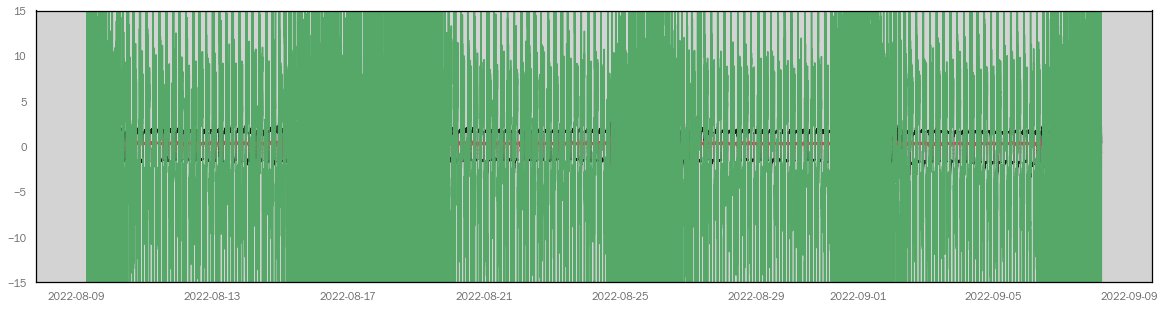

In [104]:
plt.figure(figsize=(20,5))

plt.plot(force.timestamp.values,force.F_L, '-k')
plt.plot(force.timestamp.values,force.F_D, ':r')
plt.plot(force.timestamp.values,np.rad2deg(force.alpha), '-g')
# plt.xlim([np.datetime64('2022-07-27'), np.datetime64('2022-07-28')])
plt.ylim([-15,15])

(-1.0, 1.0)

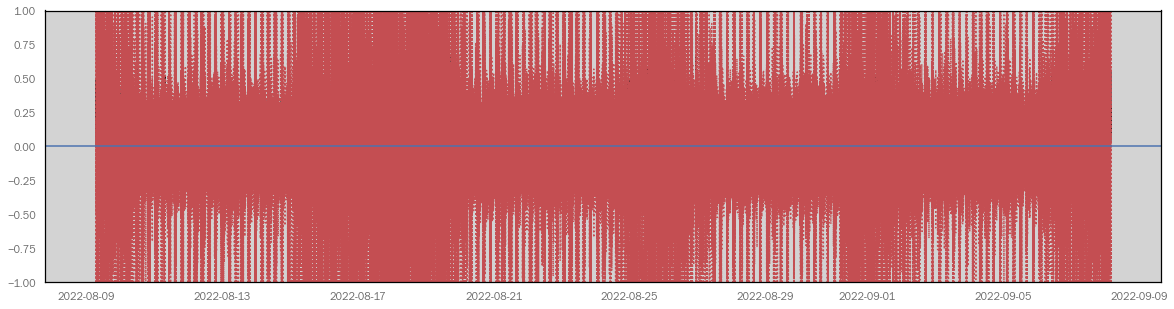

In [105]:
plt.figure(figsize=(20,5))

window = 1

plt.plot(force.timestamp.values,force.speed, '-k')
plt.plot(force.timestamp.values,filt(force.accel,window) * 100, ':r')
plt.axhline(0)

# plt.xlim([np.datetime64('2022-07-27'), np.datetime64('2022-07-28')])
plt.ylim([-1,1])

C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1554315448.py:109: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch


(-10.0, 0.0)

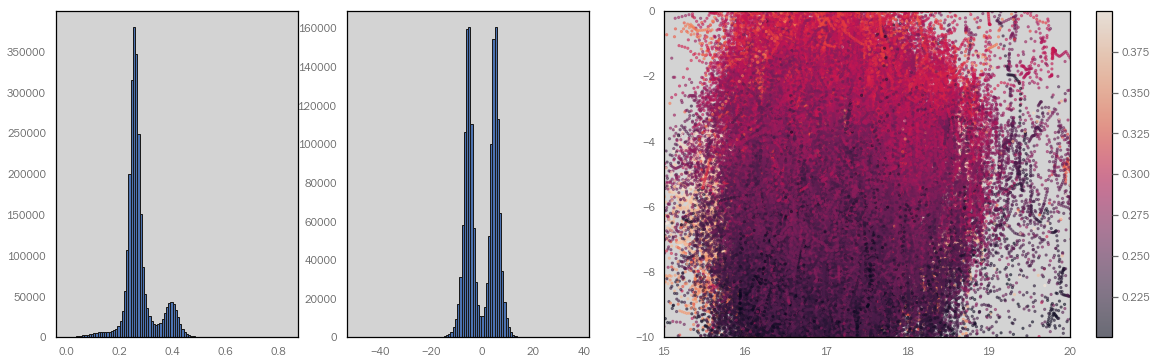

In [106]:
plt.figure(figsize=(20,6))

_gd = (force.speed > 0.2) & (force.speed < 0.4) & (force.depth < -50)  & (force.depth > -500) # & (force.timestamp.values > np.datetime64('2022-07-27')) & (force.timestamp.values < np.datetime64('2022-07-28'))

plt.subplot(141)
plt.hist(force.speed,100)

plt.subplot(142)
plt.hist(np.rad2deg(force.alpha)[_gd],100)

plt.subplot(122)
plt.scatter(np.rad2deg(force.pitch)[_gd],np.rad2deg(force.alpha)[_gd], 5, force.speed[_gd], alpha=0.5) 
plt.colorbar()
plt.xlim([15,20])
plt.ylim([-10,0])

In [107]:
# grid AOA by pitch and speed with mean and plot to show dependence

C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1554315448.py:109: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch


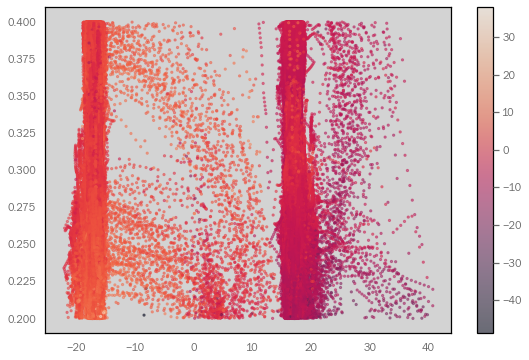

In [86]:
plt.figure(figsize=(20,6))

_gd = (force.speed > 0.2) & (force.speed < 0.4) & (force.depth < -50)  & (force.depth > -500) # & (force.timestamp.values > np.datetime64('2022-07-27')) & (force.timestamp.values < np.datetime64('2022-07-28'))

plt.subplot(122)
plt.scatter(np.rad2deg(force.pitch)[_gd], force.speed[_gd], 5,np.rad2deg(force.alpha)[_gd], alpha=0.5) 
plt.colorbar()
# plt.clim([-10,0])
# plt.xlim([15,20])
# plt.ylim([0.2,0.3])

## REGRESSIONS !

In [87]:
_gd = (force.speed > 0.2) & (force.speed < 0.4) & (force.depth < -50)  & (force.depth > -500) & ((force.navresource == 100) | (force.navresource == 117) ) 
_date =  (force.timestamp.values > np.datetime64('2022-07-27')) & (force.timestamp.values < np.datetime64('2023-07-28'))
# _date =  (force.timestamp.values > np.datetime64('2022-08-02')) & (force.timestamp.values < np.datetime64('2022-08-02'))

In [81]:
surface = 0.24

FD_seaglider = lambda coeff : force.dynamic_pressure * surface * ( force.dynamic_pressure**(-1/4) * coeff[0] + coeff[1] * force.alpha**2 )  
cost_FD_seaglider = lambda coeff : rmsd((FD_seaglider(coeff) - force.F_D)[_gd])
R_D_seaglider = fmin(cost_FD_seaglider,[1000,1000], full_output=1)
print(R_D_seaglider); CD_seaglider = R_D_seaglider[0]

FD_slocum = lambda coeff : force.dynamic_pressure * surface * ( coeff[0] + coeff[1] * force.alpha**2 )
cost_FD_slocum = lambda coeff : rmsd((FD_slocum(coeff) - force.F_D)[_gd])
R_D_slocum = fmin(cost_FD_slocum,[1000,1000], full_output=1)
print(R_D_slocum); CD_slocum = R_D_slocum[0]

FL_model = lambda coeff : force.dynamic_pressure * surface * ( coeff * force.alpha )
cost_FL_model = lambda coeff : rmsd((FL_model(coeff) - force.F_L)[_gd])
R_L_model = fmin(cost_FL_model,[1000], full_output=1)
print(R_L_model); CL_model = R_L_model[0]


C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\382028508.py:3: RuntimeWarning: divide by zero encountered in power
  FD_seaglider = lambda coeff : force.dynamic_pressure * surface * ( force.dynamic_pressure**(-1/4) * coeff[0] + coeff[1] * force.alpha**2 )
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1554315448.py:109: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch


Optimization terminated successfully.
         Current function value: 0.047280
         Iterations: 79
         Function evaluations: 151
(array([ 0.11037197, -0.42096495]), 0.04727957162724878, 79, 151, 0)
Optimization terminated successfully.
         Current function value: 0.049101
         Iterations: 82
         Function evaluations: 156
(array([ 0.04208729, -0.36892914]), 0.049100752821335435, 82, 156, 0)
Optimization terminated successfully.
         Current function value: 0.545579
         Iterations: 27
         Function evaluations: 54
(array([-1.93147659]), 0.5455788068114227, 27, 54, 0)


In [82]:
def plot_regression(X,Y):
    plt.figure(figsize=(24,6))

    plt.subplot(151)
    plt.scatter(X[_gd], Y[_gd], 5, np.rad2deg(force.alpha)[_gd], alpha=0.1)
    plt.axline([0,0],slope=1)
    plt.colorbar()

    plt.subplot(152)
    plt.scatter(X[_gd & _date], Y[_gd & _date], 5, np.rad2deg(force.alpha)[_gd & _date], alpha=0.5) 
    plt.axline([0,0],slope=1)
    plt.colorbar()

    plt.subplot(153)
    plt.scatter(X[_gd & _date], Y[_gd & _date], 5, force.speed[_gd & _date], alpha=0.5) 
    plt.axline([0,0],slope=1)
    plt.colorbar()

    plt.subplot(154)
    plt.scatter(X[_gd & _date], Y[_gd & _date], 10, force.accel[_gd & _date], alpha=0.5) 
    plt.axline([0,0],slope=1)
    plt.clim(np.array([-1,1])*0.001)
    plt.colorbar()

    plt.subplot(155)
    plt.scatter(X[_gd & _date], Y[_gd & _date], 5, force.pitch[_gd & _date], alpha=0.5) 
    plt.axline([0,0],slope=1)
    plt.colorbar()

C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\1554315448.py:109: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(self.U / np.sqrt(self.E**2 + self.N**2)) + self.pitch
C:\Users\bastien\AppData\Local\Temp\ipykernel_12820\382028508.py:3: RuntimeWarning: divide by zero encountered in power
  FD_seaglider = lambda coeff : force.dynamic_pressure * surface * ( force.dynamic_pressure**(-1/4) * coeff[0] + coeff[1] * force.alpha**2 )


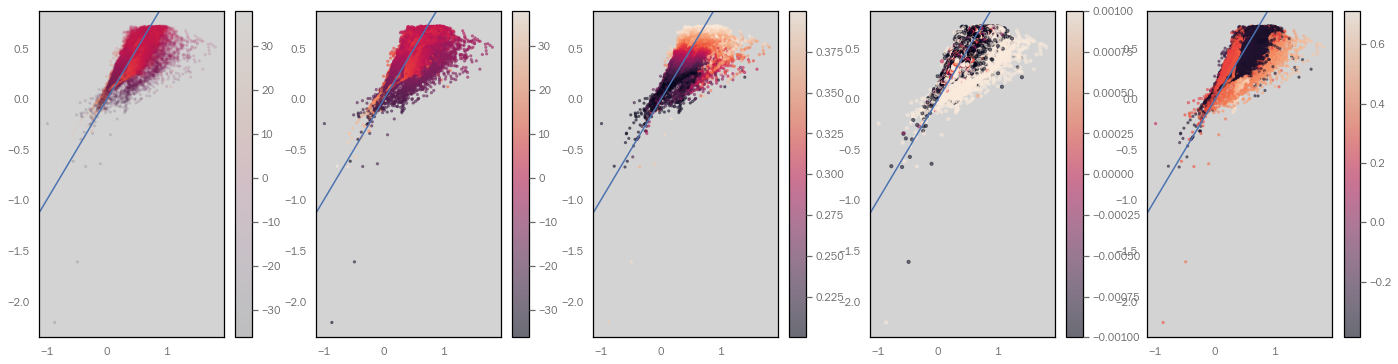

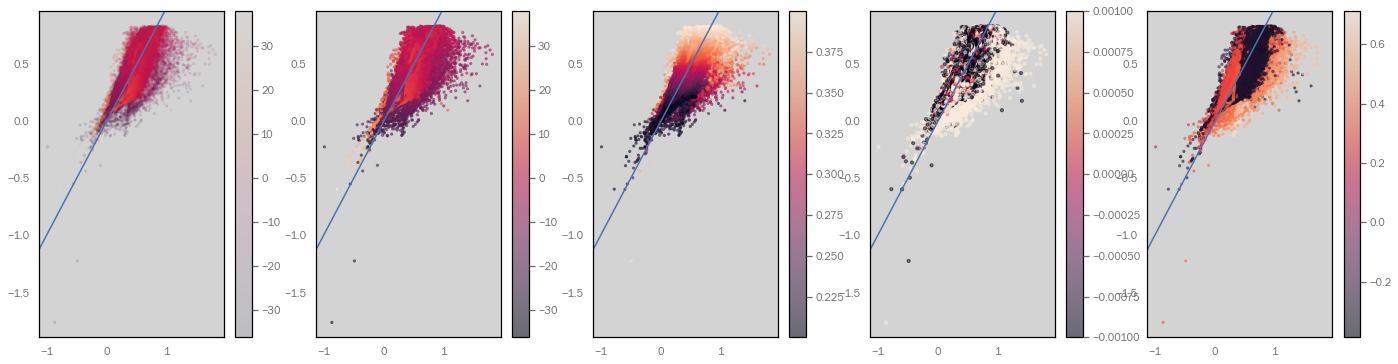

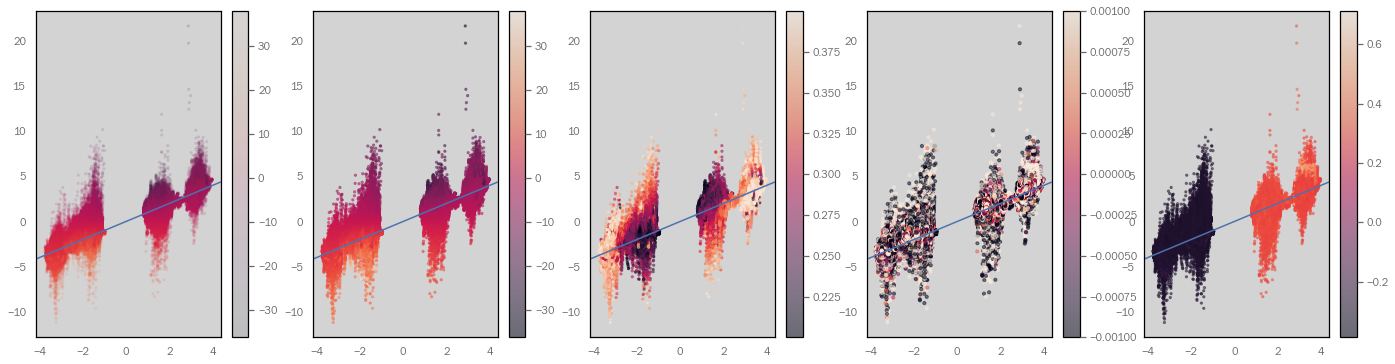

In [88]:
plot_regression(force.F_D, FD_seaglider(CD_seaglider))
plot_regression(force.F_D, FD_slocum(CD_slocum))
plot_regression(force.F_L, FL_model(CL_model))

In [89]:
xi = np.arange(200)
yi = np.arange(5,600,0.25)

T,X,Y = sx.grid2d(data.data.profileNum.values,data.data.LEGATO_PRESSURE.values,data.data.LEGATO_TEMPERATURE.values,xi=xi,yi=yi,fn='mean')
S,X,Y = sx.grid2d(data.data.profileNum.values,data.data.LEGATO_PRESSURE.values,data.data.LEGATO_SALINITY.values,xi=xi,yi=yi,fn='mean')

def merge_profiles(idx):
    x1 = S[:,idx]
    x2 = S[:,idx+1]
    y1 = T[:,idx]
    y2 = T[:,idx+1]
    _gd = np.isfinite(x1+x2+y1+y2)
    x1 = x1[_gd]
    x2 = x2[_gd]
    y1 = y1[_gd]
    y2 = y2[_gd]

    return x1,x2,y1,y2

def triangeArea(x1,y1,x2,y2,x3,y3):
    return abs((0.5)*(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2)))

area = 0 
for idd in range(np.shape(T)[1]-10):
    x1,x2,y1,y2 = merge_profiles(idd)
    area = area + np.nansum(triangeArea(
        np.append(x1,np.NaN),np.append(y1,np.NaN),
        np.append(x2,np.NaN),np.append(y2,np.NaN),
        np.append(np.NaN,x1),np.append(np.NaN,y1)  )) 
    area = area + np.nansum(triangeArea(
        np.append(np.NaN,x1),np.append(np.NaN,y1),
        np.append(x2,np.NaN),np.append(y2,np.NaN),
        np.append(np.NaN,x2),np.append(np.NaN,y2)  ))

print(area)

1543.0116581670593


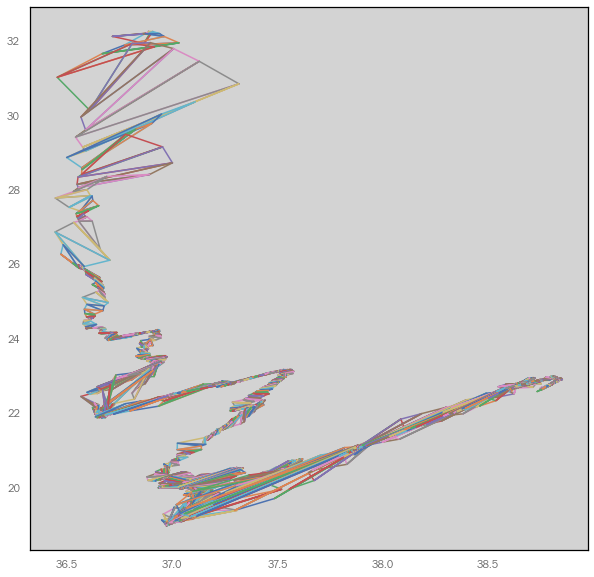

In [90]:
plt.figure(figsize=(10,10))

xs = list(zip(np.append(np.NaN,x1),np.append(x2,np.NaN),np.append(np.NaN,x2),np.append(np.NaN,x1)))
ys = list(zip(np.append(np.NaN,y1),np.append(y2,np.NaN),np.append(np.NaN,y2),np.append(np.NaN,y1)))
for idx in np.arange(0,len(xs),1):
    plt.plot(xs[idx],ys[idx])
    

xs = list(zip(np.append(x1,np.NaN),np.append(x2,np.NaN),np.append(np.NaN,x1),np.append(x1,np.NaN)))
ys = list(zip(np.append(y1,np.NaN),np.append(y2,np.NaN),np.append(np.NaN,y1),np.append(y1,np.NaN)))
for idx in np.arange(0,len(xs),1):
    plt.plot(xs[idx],ys[idx])